# <center> Segmentez des clients d'un site e-commerce ESSAIES

# 1. Introduction

Nous souhaitons proposer un modèle de segmenation afin de comprendre les différents types d'utilisateurs selon leurs comportement d'achat pour l'entreprise Olist

## 1.1 Les librairies python utilisées dans notre programme

In [1]:
import sys

sys.getdefaultencoding()  # Vérifier le type de codage

'utf-8'

In [2]:
pip install nb_black

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  error in nb_black setup command: 'install_requires' must be a string or list of strings containing valid project/version requirement specifiers; Expected end or semicolon (after name and no valid version specifier)
      yapf >= '0.28'; python_version < '3.6'
           ^
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
pip install yellowbrick

ERROR:root:Cannot parse: 1:4: pip install yellowbrick
Traceback (most recent call last):
  File "C:\Users\maimo\anaconda3\Lib\site-packages\lab_black.py", line 211, in format_cell
    formatted_code = _format_code(cell)
                     ^^^^^^^^^^^^^^^^^^
  File "C:\Users\maimo\anaconda3\Lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "src\black\__init__.py", line 1085, in format_str
  File "src\black\__init__.py", line 1095, in _format_str_once
  File "src\black\parsing.py", line 100, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 1:4: pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os

# Tableau
import numpy as np
import pandas as pd

# Dates/ durée
import datetime as dt

# Grapique
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Initiation kmeans : n_clusters
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>

In [6]:
import matplotlib  # Vérifier la version de matplotlib

print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.7.1
numpy: 1.24.3
pandas: 1.5.3
seaborn: 0.12.2


<IPython.core.display.Javascript object>

In [7]:
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## 1.2 Les fichiers utilisés 

In [8]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/projet 4/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['.ipynb_checkpoints',
 'BACAR_Maïmouna_1_notebook_exploratoire_062023.ipynb',
 "BACAR_Maïmouna_2_notebook d'essais-062023.ipynb",
 'BACAR_Maïmouna_2_notebook_simulation-062023-Copy1.ipynb',
 'BACAR_Maïmouna_2_notebook_simulation-062023.ipynb',
 'Bacar_Maïmouna_4_presentation_062023.pdf',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

<IPython.core.display.Javascript object>

# 2. L'assemblage des datas qui nous intéressent 

Nous allons rassembler tous nos datas utiles à notre clustering en un seul data afin da facilite notre étude par la suite. De surcroît, nous utiliserons *.merge()* qui permet de rassembler des datas partageant une même colonne.

## 2.1 Clients

In [9]:
customers = pd.read_csv(path + "olist_customers_dataset.csv")  # client
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


<IPython.core.display.Javascript object>

## 2.2 Commandes des clients

In [10]:
orders_dataset = pd.read_csv(path + "olist_orders_dataset.csv")
orders_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


<IPython.core.display.Javascript object>

## 2.3 Articles

In [11]:
order_items = pd.read_csv(path + "olist_order_items_dataset.csv")  # commande
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


<IPython.core.display.Javascript object>

## 2.4 Moyen de paiement

Les différents moyens de paiements

In [12]:
payments = pd.read_csv(path + "olist_order_payments_dataset.csv")
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


<IPython.core.display.Javascript object>

## 2.5 Commentaires des clients

In [13]:
reviews = pd.read_csv(path + "olist_order_reviews_dataset.csv")
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


<IPython.core.display.Javascript object>

## 2.6 Assemblage de notre data finale

In [14]:
data_total = pd.merge(customers, orders_dataset, on="customer_id")
data_total.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00


<IPython.core.display.Javascript object>

In [15]:
data_total = data_total.merge(order_items, on="order_id")

<IPython.core.display.Javascript object>

In [16]:
data_total = data_total.merge(reviews, on="order_id")

<IPython.core.display.Javascript object>

In [17]:
data_total = data_total.merge(payments, on="order_id")

<IPython.core.display.Javascript object>

In [18]:
data_total.columns  # vérifications des colonnes de notre nouveau data

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

<IPython.core.display.Javascript object>

In [19]:
data_total.shape

(117329, 28)

<IPython.core.display.Javascript object>

Nous avons ainsi un nouveau jeu de donnée ***data_total*** qui est un condensé des datas les plus utiles pour la suite de nos analyses

# 3 Analyse RFM 

## 3.1 Définition de l'analyse RFM

Nous allons réaliser une analyse de RFM (Recency, Frequency and Monetary) en d'autres termes une analyse se basant sur la récurrence, la fréquence et le prix. Cette analyse permet de prédire le comportement d'un nouveau client à partir du comportement de nos clients présents dans notre base de données. En outre, l'étude RFM est fondée sur :


**Recency :** correspond à la durée écoulée depuis la dernière interaction d'un client avec la marque. Cette période est une mesure essentielle. En effet, les clients ayant récemment interagi avec la marque sont plus susceptibles de répondre à de nouveaux efforts de marketing

**Fréquence :** correspond au nombre de fois qu'un client a réalisé un achat ou interagi avec la marque au cours d'une période donnée. La fréquence est un indicateur essentiel. En effet, elle manifeste le degré d'engagement d'un client à l'égard de la marque. Ainsi, plus fréquence est grande plus le degré de fidélité de la part du client est grand.

**Valeur monétaire :** correspond au montant total dépensé par un client pour acheter des produits et des services de la marque pendant une période donnée. La valeur monétaire est aussi un indicateur essentiel. En effet, les clients ayant dépensé le plus dans le passé sont plus susceptible de dépenser autant ou plus.

## 3.2 Réalisation du tableau RFM

Maintenant que nous avons défini l'analyse RFM nous allons commencer notre analyse. En premier lieu nous avons besoin de réaliser un tableau avec les variables recency, frequency et monetary. Ce tableau aura comme index l'identifiant unique du client c'est à dire customer_unique_id.

Ces variables ne sont pas compliqué à déterminer à partir de notre jeu de donnée. Voici, ci-dessous les méthodes de calculs de ces variables.

**recency :**  la durée en jours entre la date la plus récente du data et la date de la dernière commande du client.         

<center> $recency=(DateEtude - x.max()).days$, avec x= data_total[ 'order_purchase_timestamp' ]

**frequency :**  le nombre de la commande (order_id) pour un identifant client (customer_unique_id), soit le nombre de valeur nunique de order_id par (customer_unique_id).                                                             
<center> $frequency=x.nunique()$ avec x=data_total [ 'order_id' ]

**monetary :** la somme du prix (price) de toutes les commandes passées par un client (customer_unique_id). 

 <center> $Monetary=sum(x)$, avec x=data_total[ 'price' ]

### Calcul de la période

In [20]:
# Cette fonction convertit un tableau type serie en un objet datetime pandas
data_total["order_purchase_timestamp"] = pd.to_datetime(
    data_total["order_purchase_timestamp"]
)
data_total["order_purchase_timestamp"]

0        2017-05-16 15:05:35
1        2018-01-12 20:48:24
2        2018-05-19 16:07:45
3        2018-03-13 16:06:38
4        2018-07-29 09:51:30
                 ...        
117324   2018-04-07 15:48:17
117325   2018-04-04 08:20:22
117326   2018-04-08 20:11:50
117327   2017-11-03 21:08:33
117328   2017-12-19 14:27:23
Name: order_purchase_timestamp, Length: 117329, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [21]:
# Calcule la date de l'étude qui correspond à la date "actuelle"
now_date = max(data_total.order_purchase_timestamp) + dt.timedelta(days=1)

<IPython.core.display.Javascript object>

### Création du tableau RFM

In [22]:
# Création d'un tableau RFM avec 'customer_unique_id' comme index et application des formules
Tableau_rfm = data_total.groupby("customer_unique_id").agg(
    {
        "order_purchase_timestamp": lambda x: (now_date - x.max()).days,
        "order_id": lambda x: x.nunique(),
        "price": lambda x: sum(x),
    }
)


# le nom des colonnes
Tableau_rfm.rename(
    columns={
        "order_purchase_timestamp": "Recency",
        "order_id": "Frequency",
        "price": "Monetary",
    },
    inplace=True,
)
Tableau_rfm

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
0000f46a3911fa3c0805444483337064,542,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00
fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
ffff371b4d645b6ecea244b27531430a,573,1,89.90


<IPython.core.display.Javascript object>

Notre tableau réalisé, nous pouvons passer à l'interprétation de notre jeu de données

## 3.3 Statistique du tableau RFM

Maintenant que nous avons le tableau RFM nous pouvons faire une première approche avec la methode describe() et réaliser un graphe afin d'observer la distribution de ces 3 variables.

In [23]:
Tableau_rfm.describe()

,Recency,Frequency,Monetary
count,94720.000000,94720.000000,94720.000000
mean,243.437817,1.033742,149.292666
std,153.163707,0.210529,248.710140
min,1.000000,1.000000,0.850000
25%,119.000000,1.000000,48.900000
50%,224.000000,1.000000,89.900000
75%,353.000000,1.000000,159.900000
max,729.000000,16.000000,13440.000000


<IPython.core.display.Javascript object>

Nous pouvons constater qu'en moyenne les clients commande qu'une seule fois sur le site et dépensent environ 142 Real soit 26.88 euro. Il serait plus pertinent d'observer la distribution de ces 3 variables sur un graphe

Text(0.5, 0, 'Durée en jours depuis la dernière connexion du client')

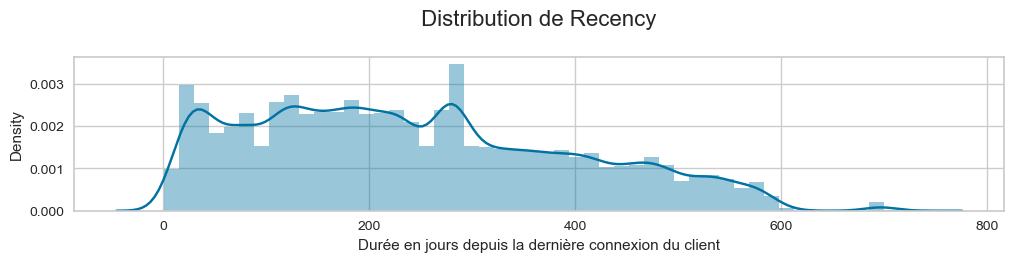

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(12, 2))
# Distribution Recency 
sns.distplot(Tableau_rfm['Recency'])
plt.title(' Distribution de Recency \n ', fontsize=16)
plt.xlabel('Durée en jours depuis la dernière connexion du client')


La majorité des clients sont connectés pour la dernière fois en moins d'un an et demi

Text(0.5, 0, "La fréquence d'achat d'un client")

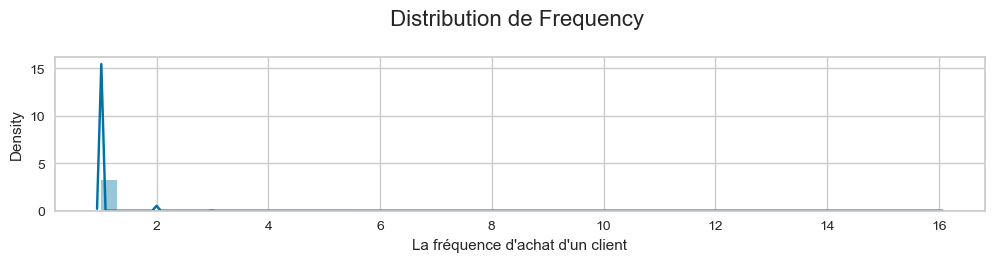

<IPython.core.display.Javascript object>

In [25]:
# Distribution Frequency
plt.figure(figsize=(12, 2))
sns.distplot(Tableau_rfm['Frequency'])
plt.title(' Distribution de Frequency  \n', fontsize=16)
plt.xlabel('La fréquence d\'achat d\'un client')


La majorité des clients effectuent un seule achat sur le site

Text(0.5, 0, 'Le total de real dépensé par un client')

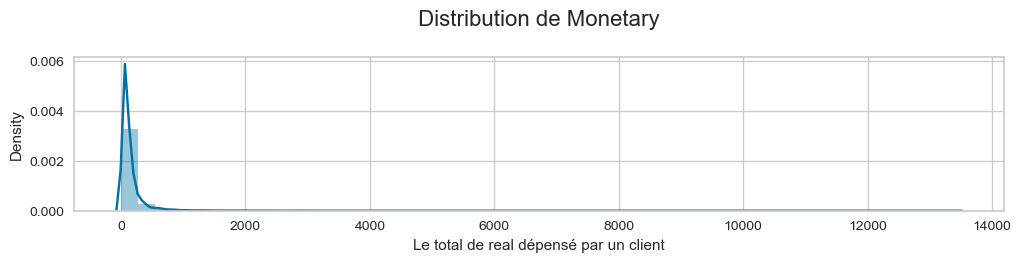

<IPython.core.display.Javascript object>

In [26]:
# Distribution de  Monetary
plt.figure(figsize=(12, 2))

sns.distplot(Tableau_rfm["Monetary"])
plt.title(" Distribution de Monetary \n", fontsize=16)
plt.xlabel("Le total de real dépensé par un client")

## 3.4 Nouvelle table RFM

Notre étude se base uniquement sur les clients réalisant plusieurs commandes sur le site e-commerce. De surcroît nous allons réaliser une nouvelle table contenant uniquement les clients ayant effectué plusieurs achats. 

In [27]:
Tableau_rfm2 = Tableau_rfm.copy()  # faire une copie

<IPython.core.display.Javascript object>

In [28]:
# Selection des lignes ayant la valeur 1 dans la variable frequency
ligne_freq1 = Tableau_rfm2.loc[Tableau_rfm["Frequency"] == 1]
ligne_freq1.head(2)

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.9
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.9


<IPython.core.display.Javascript object>

In [29]:
liste_freq1 = list(
    ligne_freq1["Frequency"]
)  # création d'une liste des lignes ayant la valeur 1 dans la vaiable frequency
len(liste_freq1)
print(
    f"nous allons supprimer {len(liste_freq1)} lignes correspondant aux clients ayant effectués 1 seule commande"
)

nous allons supprimer 91851 lignes correspondant aux clients ayant effectués 1 seule commande


<IPython.core.display.Javascript object>

In [30]:
# Les index des lignes apparetennant à liste_freq1
index_inutile = Tableau_rfm2.loc[Tableau_rfm2["Frequency"].isin(liste_freq1)].index
index_inutile

Index(['0000366f3b9a7992bf8c76cfdf3221e2', '0000b849f77a49e4a4ce2b2a4ca5be3f',
       '0000f46a3911fa3c0805444483337064', '0000f6ccb0745a6a4b88665a16c9f078',
       '0004aac84e0df4da2b147fca70cf8255', '0004bd2a26a76fe21f786e4fbd80607f',
       '00050ab1314c0e55a6ca13cf7181fecf', '00053a61a98854899e70ed204dd4bafe',
       '0005e1862207bf6ccc02e4228effd9a0', '0005ef4cd20d2893f0d9fbd94d3c0d97',
       ...
       'fff96bc586f78b1f070da28c4977e810', 'fffa431dd3fcdefea4b1777d114144f2',
       'fffb09418989a0dbff854a28163e47c6', 'fffbf87b7a1a6fa8b03f081c5f51a201',
       'fffcc512b7dfecaffd80f13614af1d16', 'fffcf5a5ff07b0908bd4e2dbc735a684',
       'fffea47cd6d3cc0a88bd621562a9d061', 'ffff371b4d645b6ecea244b27531430a',
       'ffff5962728ec6157033ef9805bacc48', 'ffffd2657e2aad2907e67c3e9daecbeb'],
      dtype='object', name='customer_unique_id', length=91851)

<IPython.core.display.Javascript object>

In [31]:
# suppression toutes les lignes dont l'index appartient à index_inutile
print(f"Ancien shape= {Tableau_rfm2.shape}")
a = Tableau_rfm2.shape[0]
Tableau_rfm2.drop(index=index_inutile, axis=0, inplace=True)
b = Tableau_rfm2.shape[0]
print(f"Nouveau shape= {Tableau_rfm2.shape}\n")
print(f"On a donc supprimé {a-b} lignes")
print(f" La nouvelle valeur minimun de Frequency : { Tableau_rfm2['Frequency'].min()}")

Ancien shape= (94720, 3)
Nouveau shape= (2869, 3)

On a donc supprimé 91851 lignes
 La nouvelle valeur minimun de Frequency : 2


<IPython.core.display.Javascript object>

Nous avons ainsi la nouvelle table contenant uniquement les clients ayant réalisé plusieurs achats.

In [32]:
Tableau_rfm2  # Nouvelle table

,Recency,Frequency,Monetary
customer_unique_id,,,
004288347e5e88a27ded2bb23747066c,233,2,317.89
004b45ec5c64187465168251cd1c9c2f,100,2,86.90
0058f300f57d7b93c477a131a59b36c3,165,2,205.06
00a39521eb40f7012db50455bf083460,92,2,81.45
00cc12a6d8b578b8ebd21ea4e2ae8b27,531,2,199.60
...,...,...,...
ff22e30958c13ffe219db7d711e8f564,1,2,290.00
ff44401d0d8f5b9c54a47374eb48c1b8,472,2,79.60
ff8892f7c26aa0446da53d01b18df463,281,2,327.90


<IPython.core.display.Javascript object>

## 3.5 Système de points 

Dans le but d'obtenir une première approche nous allons réalisé une analyse avec l'aide d'un système de points se basant sur  les quantiles. Pour cela nous allons créer un dictionnaire appelé score où la clé sera la colonne du tableau RFM et la valeur sera la valeur du quantile accompagnée de la valeur de la variable correspondante.

In [33]:
score = (
    Tableau_rfm2[["Recency", "Frequency", "Monetary"]]
    .quantile([0.2, 0.4, 0.6, 0.8])
    .to_dict()
)
score

{'Recency': {0.2: 88.0, 0.4: 169.20000000000005, 0.6: 250.0, 0.8: 358.0},
 'Frequency': {0.2: 2.0, 0.4: 2.0, 0.6: 2.0, 0.8: 2.0},
 'Monetary': {0.2: 107.21600000000001,
  0.4: 165.8,
  0.6: 239.97799999999998,
  0.8: 387.694}}

<IPython.core.display.Javascript object>

Afin de calculer ses points par clients nous allons réaliser une fonction. Cette fonction applique une valeur entre 1 et 5 selon la position de la valeur par rapport aux quantiles. Ainsi une valeur dans le dernier quantile donc ayant une valeur supérieur à 358 jours pour la colonne 'Recency' aura 1 point

In [34]:
def Recency(x):  # Plus la periode est courte plus le score est proche de 5
    if x <= score["Recency"][0.2]:
        return 5
    elif x <= score["Recency"][0.4]:
        return 4
    elif x <= score["Recency"][0.6]:
        return 3
    elif x <= score["Recency"][0.8]:
        return 2
    else:
        return 1

<IPython.core.display.Javascript object>

In [35]:
# Applique la fonction et ajout à la table colonne R
Tableau_rfm2["R"] = Tableau_rfm2["Recency"].apply(lambda x: Recency(x))

<IPython.core.display.Javascript object>

In [36]:
Tableau_rfm2.head(2)

,Recency,Frequency,Monetary,R
customer_unique_id,,,,
004288347e5e88a27ded2bb23747066c,233,2,317.89,3
004b45ec5c64187465168251cd1c9c2f,100,2,86.90,4


<IPython.core.display.Javascript object>

Nous allons réaliser la même fonction pour les colonnes Frequency et Monetary cependant le système de point sera l'inverse que celui de Recency

In [37]:
def Frequency(x):  # plus la valeur de la fgréquence est haute plus le score est haut
    if x <= score["Recency"][0.2]:
        return 1
    elif x <= score["Recency"][0.4]:
        return 2
    elif x <= score["Recency"][0.6]:
        return 3
    elif x <= score["Recency"][0.8]:
        return 4
    else:
        return 5

<IPython.core.display.Javascript object>

In [38]:
# applique la fonction et ajout à la table colonne F
Tableau_rfm2["F"] = Tableau_rfm2["Frequency"].apply(lambda x: Frequency(x))

<IPython.core.display.Javascript object>

In [39]:
def Monetary(x):  # plus la valeur dépensée est grande plus le score est haut
    if x <= score["Recency"][0.2]:
        return 1
    elif x <= score["Recency"][0.4]:
        return 2
    elif x <= score["Recency"][0.6]:
        return 3
    elif x <= score["Recency"][0.8]:
        return 4
    else:
        return 5

<IPython.core.display.Javascript object>

In [40]:
# Applique la fonction et ajout à la table colonne M
Tableau_rfm2["M"] = Tableau_rfm2["Monetary"].apply(
    lambda x: Monetary(x)
)  # Applique la fonction et ajout à la table

<IPython.core.display.Javascript object>

In [41]:
Tableau_rfm2.head()

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
004288347e5e88a27ded2bb23747066c,233,2,317.89,3,1,4
004b45ec5c64187465168251cd1c9c2f,100,2,86.90,4,1,1
0058f300f57d7b93c477a131a59b36c3,165,2,205.06,4,1,3
00a39521eb40f7012db50455bf083460,92,2,81.45,4,1,1
00cc12a6d8b578b8ebd21ea4e2ae8b27,531,2,199.60,1,1,3


<IPython.core.display.Javascript object>

Nous avons actuellement un tableau de score. Maintenant nous pouvons induire les différents groupes de client. Nous allons ainsi segmenter notre tableau.

## 3.6 Les segments

Nous allons rassembler nos scores obtenus selon des groupes de type de client, dit segments

Dans le marketing il existe différents segments qui sont :

* **Champions :** effectue des achats récents, achète souvent et dépense beaucoup

* **Loyal Customers :** achètent régulièrement

* **Potential Loyalist :** nouveaux clients avec fréquence d'achat moyenne

* **Recent Customers :** achats récents, mais peu fréquents

* **Promising :**   nouveaux acheteurs, mais peu dépensiers

* **Need Attention :** dépenses moyennes, moyennement fréquemment, achat moyennement récent

* **About to Sleep :** client qui tendent à disparaitre

* **Can't Lose Them :** achètaient régulièrement, besoin de les faire revenir

* **At Risk :** dépensaient beaucoup, achetaient souvent mais il y a lomgtemps

* **Lost :** peu dépensiers, peu fréquements, a acheté il y a un moment

* **Others :** pas catégorisable

Afin d'établir ces segments nous allons réaliser une fonction dont un intervalle de valeur spécifique des score R, F et M correspond à une catégorie

In [42]:
def segments(rfm):
    if 4 <= rfm["R"] <= 5 and 4 <= rfm["F"] <= 5 and 4 <= rfm["M"] <= 5:
        return "Champions"

    elif 3 <= rfm["R"] <= 5 and 3 <= rfm["F"] <= 5 and 2 <= rfm["M"] <= 5:
        return "Loyal Customers"

    elif 3 <= rfm["R"] <= 5 and 1 <= rfm["F"] <= 3 and 1 <= rfm["M"] <= 3:
        return "Potential Loyalist"

    elif rfm["R"] >= 4 and rfm["F"] <= 2:
        return "Recent Customers"

    elif 3 <= rfm["R"] <= 4 and rfm["F"] <= 1 and rfm["M"] <= 1:
        return "Promising"

    elif 2 <= rfm["R"] <= 3 and 2 <= rfm["F"] <= 3 and 2 <= rfm["M"] <= 3:
        return "Need Attention"

    elif 2 <= rfm["R"] <= 3 and rfm["F"] <= 2 and rfm["M"] <= 2:
        return "About to Sleep"

    elif rfm["R"] <= 1 and 4 <= rfm["F"] <= 5 and 4 <= rfm["M"] <= 5:
        return "Can't Lose Them"

    elif rfm["R"] <= 2 and 2 <= rfm["F"] <= 5 and 2 <= rfm["M"] <= 5:
        return "At Risk"

    elif rfm["R"] <= 2 and rfm["F"] <= 2 and rfm["M"] <= 2:
        return "Lost"

    else:
        return "Others"

<IPython.core.display.Javascript object>

In [43]:
# Applique la fonction et ajout à la table colonne segment
Tableau_rfm2["Segment"] = Tableau_rfm2.apply(segments, axis=1)

<IPython.core.display.Javascript object>

In [44]:
Tableau_rfm2

,Recency,Frequency,Monetary,R,F,M,Segment
customer_unique_id,,,,,,,
004288347e5e88a27ded2bb23747066c,233,2,317.89,3,1,4,Others
004b45ec5c64187465168251cd1c9c2f,100,2,86.90,4,1,1,Potential Loyalist
0058f300f57d7b93c477a131a59b36c3,165,2,205.06,4,1,3,Potential Loyalist
00a39521eb40f7012db50455bf083460,92,2,81.45,4,1,1,Potential Loyalist
00cc12a6d8b578b8ebd21ea4e2ae8b27,531,2,199.60,1,1,3,Others
...,...,...,...,...,...,...,...
ff22e30958c13ffe219db7d711e8f564,1,2,290.00,5,1,4,Recent Customers
ff44401d0d8f5b9c54a47374eb48c1b8,472,2,79.60,1,1,1,Lost
ff8892f7c26aa0446da53d01b18df463,281,2,327.90,2,1,4,Others


<IPython.core.display.Javascript object>

Nous avons ainsi notre tableau avec les segments ci-dessous. Il serait intéressent d'observer la statistique (la moyenne, la médiane, la valeur minimun et la valeur maximun de chaque groupe de segment). Ainsi nous allons réaliser une table dont l'indexation sera la colonne 'segment'

In [45]:
# STATISTIQUES sur "Recency", "Frequency", "Monetary par rapport au segment
rfm_statistics = (
    Tableau_rfm2[["Segment", "Recency", "Frequency", "Monetary"]]
    .groupby("Segment")
    .agg(["mean", "median", "min", "max", "count"])
)

rfm_statistics

Recency                        Frequency             \
                          mean median  min  max count      mean median min   
Segment                                                                      
About to Sleep      299.783898  294.0  252  358   236  2.012712    2.0   2   
Lost                458.930328  451.0  360  697   244  2.069672    2.0   2   
Others              329.306667  315.0  170  695   900  2.118889    2.0   2   
Potential Loyalist  125.618596  123.0    6  250  1054  2.047438    2.0   2   
Recent Customers     88.390805   88.0    1  169   435  2.344828    2.0   2   

                                Monetary                                  
                   max count        mean   median     min      max count  
Segment                                                                   
About to Sleep       3   236  105.253220  105.395   25.80   167.89   236  
Lost                 6   244  101.522254  107.350   20.70   169.00   244  
Others               9   900  458.279422  322.500  169.40  7388.00   900  
Potential Loyalist   4  1054  140.663283  138.895   17.97   250.00  1054  
Recent Customers    16   435  531.960713  407.000  250.10  4080.00   435

<IPython.core.display.Javascript object>

En observant les statistiques,  le choix des segments semble être cohérent. En outre, afin de compléter cette table il serait intéressent de rajouter une colonne sur le pourcentage de clients par segments

In [46]:
rfm_statistics["Ratio"] = (
    100
    * rfm_statistics["Monetary"]["count"]
    / rfm_statistics["Monetary"]["count"].sum()
).round(2)
rfm_statistics

Recency                        Frequency             \
                          mean median  min  max count      mean median min   
Segment                                                                      
About to Sleep      299.783898  294.0  252  358   236  2.012712    2.0   2   
Lost                458.930328  451.0  360  697   244  2.069672    2.0   2   
Others              329.306667  315.0  170  695   900  2.118889    2.0   2   
Potential Loyalist  125.618596  123.0    6  250  1054  2.047438    2.0   2   
Recent Customers     88.390805   88.0    1  169   435  2.344828    2.0   2   

                                Monetary                                  \
                   max count        mean   median     min      max count   
Segment                                                                    
About to Sleep       3   236  105.253220  105.395   25.80   167.89   236   
Lost                 6   244  101.522254  107.350   20.70   169.00   244   
Others               9   900  458.279422  322.500  169.40  7388.00   900   
Potential Loyalist   4  1054  140.663283  138.895   17.97   250.00  1054   
Recent Customers    16   435  531.960713  407.000  250.10  4080.00   435   

                    Ratio  
                           
Segment                    
About to Sleep       8.23  
Lost                 8.50  
Others              31.37  
Potential Loyalist  36.74  
Recent Customers    15.16

<IPython.core.display.Javascript object>

Afin de cloturer cette partie il serait intéressant de visualiser le ratio de client par segment à travers d'un graphe

In [47]:
# Nombre de client par segment
segments_counts = Tableau_rfm2["Segment"].value_counts().sort_values(ascending=True)
segments_counts

About to Sleep         236
Lost                   244
Recent Customers       435
Others                 900
Potential Loyalist    1054
Name: Segment, dtype: int64

<IPython.core.display.Javascript object>

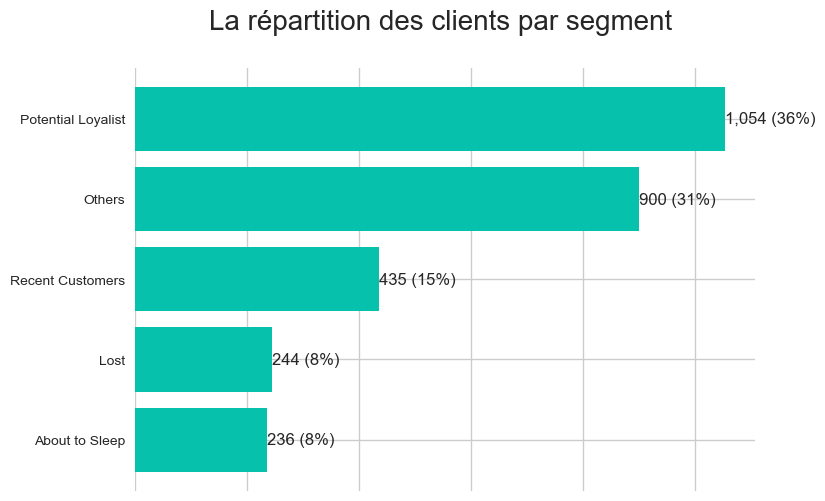

<IPython.core.display.Javascript object>

In [48]:
# Graphe du nombre de client par segment
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)), segments_counts, color="#06C2AC")
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
    value = bar.get_width()

    ax.text(
        value,
        bar.get_y() + bar.get_height() / 2,
        "{:,} ({:}%)".format(int(value), int(value * 100 / segments_counts.sum())),
        va="center",
        ha="left",
    )

plt.title("La répartition des clients par segment \n", fontsize=20)
plt.show()

D'après cette première analyse de RFM, on s'aperçoit que la grande majorité des clients sont des Potential Loyalist, ce qui est prometteur pour l'entreprise. Néanmoins, le seconde plus grand segment est 'others', ce qui est problèmatique pour l'entreprise. En effet notre segmentation possède beaucoup de client non classées. Il vaudrait mieux pour nous de procédér à une autre méthode de segmentation.

# 4 Initiation du Clustering

Nous avons réalisé une premier approche de la segmentation. Ici nous allons utiliser une seconde approche de la segmentation qui est plus récurrente et pertinente. Cette seconde technique implique du machine learning notamment l'apprentissage non supervisé, nommée aussi clustering. 

Le clustering est une discipline particulière du Machine Learning ayant pour but de séparer vos données en groupes homogènes possédant des caractéristiques communes. Par conséquent, le clustering est très apprécié en marketing. En effet, il permet de segmenter les bases clients pour détecter des comportements particuliers. Dans notre cas, nous utiliserons la méthode k-means. De plus, l'algorithme de K-means (K-moyennes) est un algorithme non supervisé très populaire en matière de Clustering. 

## 4.1 Normalisation

Dans un premier lieu, afin de pouvoir utiliser la méthode k-means, nous allons normaliser nos valeurs. Pour cela nous allons standariser nos valeurs avec la méthode *StandardScaler()* 

### 4.1.1 Rappel de la table

In [49]:
cols_rfm = ["Recency", "Frequency", "Monetary"]  # les colonnes concernées

<IPython.core.display.Javascript object>

In [50]:
Tableau_rfm2[cols_rfm].head()  # la table à normaliser

,Recency,Frequency,Monetary
customer_unique_id,,,
004288347e5e88a27ded2bb23747066c,233,2,317.89
004b45ec5c64187465168251cd1c9c2f,100,2,86.90
0058f300f57d7b93c477a131a59b36c3,165,2,205.06
00a39521eb40f7012db50455bf083460,92,2,81.45
00cc12a6d8b578b8ebd21ea4e2ae8b27,531,2,199.60


<IPython.core.display.Javascript object>

### 4.1.2  Table normalisée

In [51]:
scaler = StandardScaler()  # normaliser
scaler.fit(Tableau_rfm2[cols_rfm])

RFM_scaled = scaler.fit_transform(Tableau_rfm2[cols_rfm])
RFM_scaled_df = pd.DataFrame(
    RFM_scaled
)  # création d'un data avec nos valeurs standarisées
RFM_scaled_df.columns = ["Recency", "Frequency", "Monetary"]
RFM_scaled_df

,Recency,Frequency,Monetary
0,0.044546,-0.223559,0.068794
1,-0.873215,-0.223559,-0.579704
2,-0.424685,-0.223559,-0.247973
3,-0.928419,-0.223559,-0.595004
4,2.100885,-0.223559,-0.263302
...,...,...,...
2864,-1.556361,-0.223559,-0.009506
2865,1.693757,-0.223559,-0.600198
2866,0.375769,-0.223559,0.096897
2867,0.879503,1.737879,-0.557553


<IPython.core.display.Javascript object>

Nous avons ainsi une nouvelle table normalisée

## 4.2 Clusterisation avec k-means trouver le meilleur k

Avant d'utilser la méthode k-means nous devons déterminer la meilleur valeur du  nombre de clusters *(n_clusters)*  pour optimiser au maximun notre modèle. Pour cela nous pouvons utiliser 3 méthodes différentes.

### 4.2.2 Méthode 2 : KElbowVisualizer

Le KElbowVisualizer met en œuvre la méthode du « coude » pour aider  à sélectionner le nombre optimal de clusters en ajustant le modèle avec une plage de valeurs.

Si le graphique linéaire ressemble à un bras, le « coude » (le point d'inflexion sur la courbe) est une bonne indication que le modèle sous-jacent s'adapte le mieux à ce point. Dans le visualiseur, "coude" sera annoté par une ligne en pointillés.


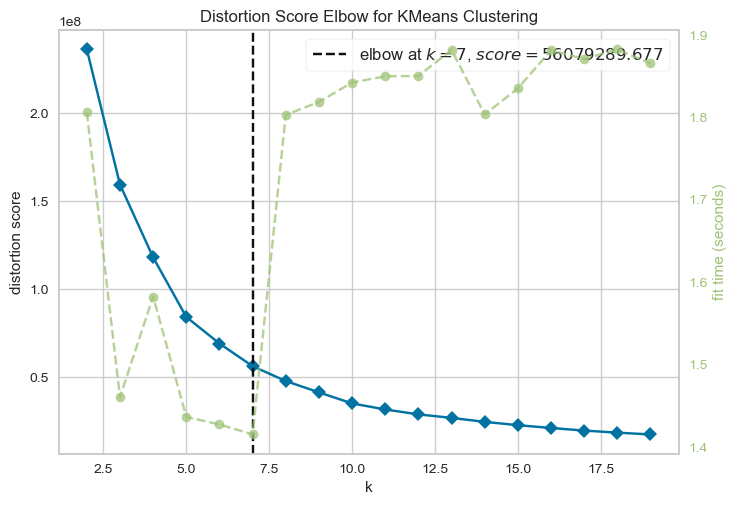

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [52]:
k_means = KMeans()
elbow = KElbowVisualizer(
    k_means, k=(2, 20)
)  # dans une plage de valeur de k compris entre 2 et 20
elbow.fit(
    Tableau_rfm2[cols_rfm]
)  # entraine avec notre table de réference Tableau_rfm2 pour le clustering
elbow.show()

La meilleur valeur de k (*n_clusters*) d'après cette méthode pour notre étude serait 7

### 4.2.3 Méthode 3 : Silhouette

La méthode de silhouette est également une méthode pour trouver le nombre optimal de clusters. Le coefficient de silhouette est une mesure de la similitude d’un point de données à l’intérieur d’un groupe par rapport à d’autres groupes.

In [53]:
range_n_clusters = [2, 4, 5, 6, 7, 10]  # les valeurs de k à tester

<IPython.core.display.Javascript object>

In [54]:
X = Tableau_rfm2[cols_rfm].values

<IPython.core.display.Javascript object>

For n_clusters = 2 The average silhouette_score is : 0.7412411855444099
For n_clusters = 4 The average silhouette_score is : 0.44181945608909773
For n_clusters = 5 The average silhouette_score is : 0.4129284128775581
For n_clusters = 6 The average silhouette_score is : 0.4143921255531329
For n_clusters = 7 The average silhouette_score is : 0.40019254099309515
For n_clusters = 10 The average silhouette_score is : 0.3700507901581385


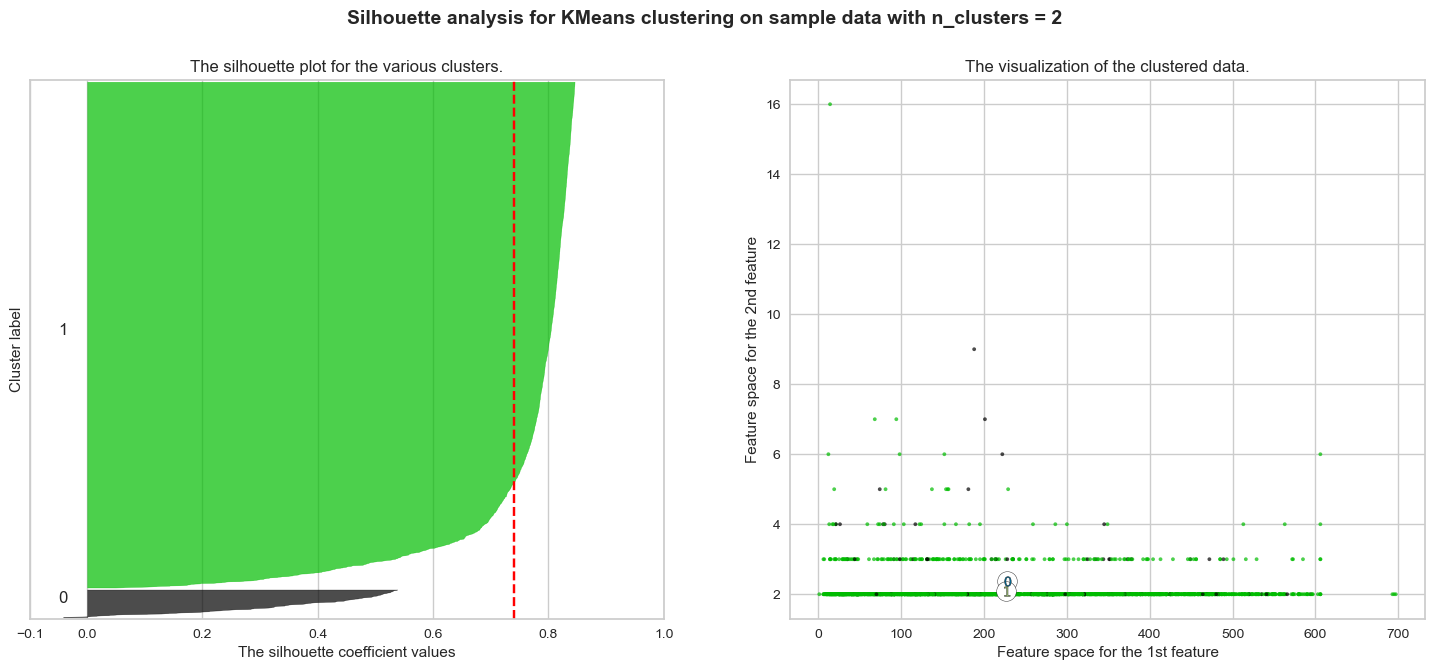

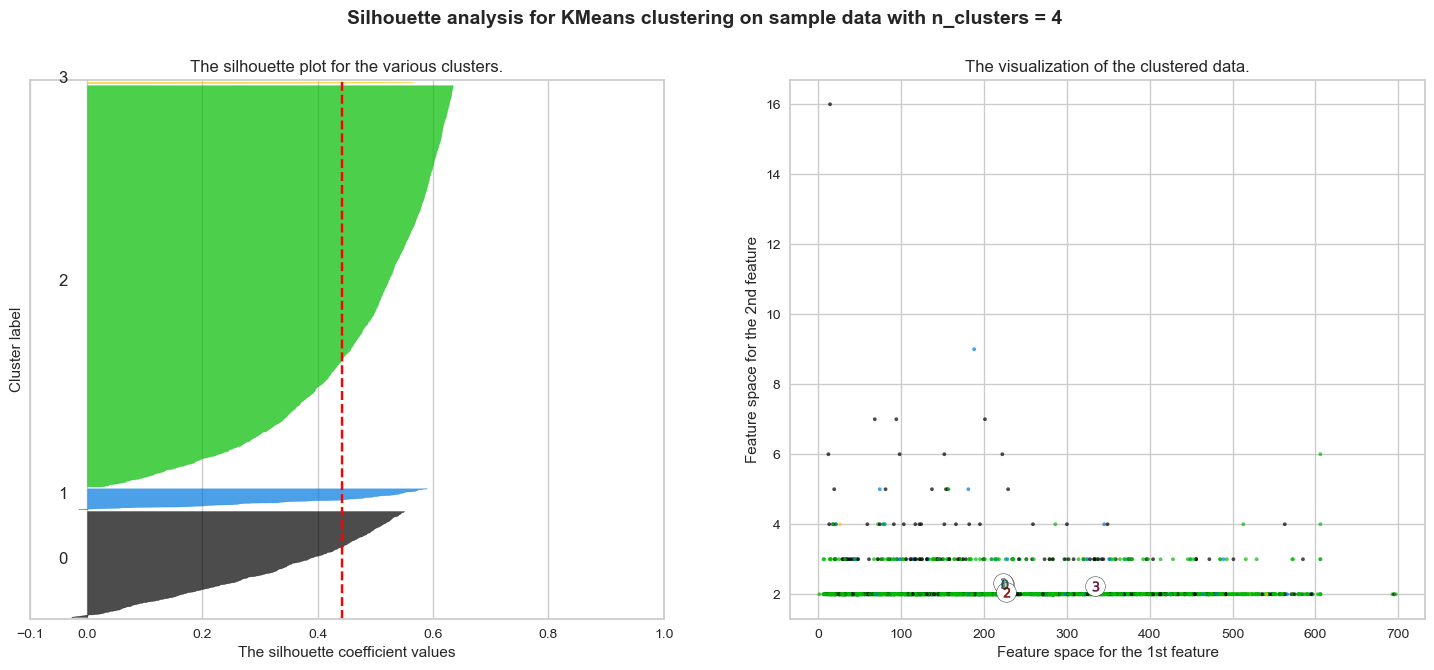

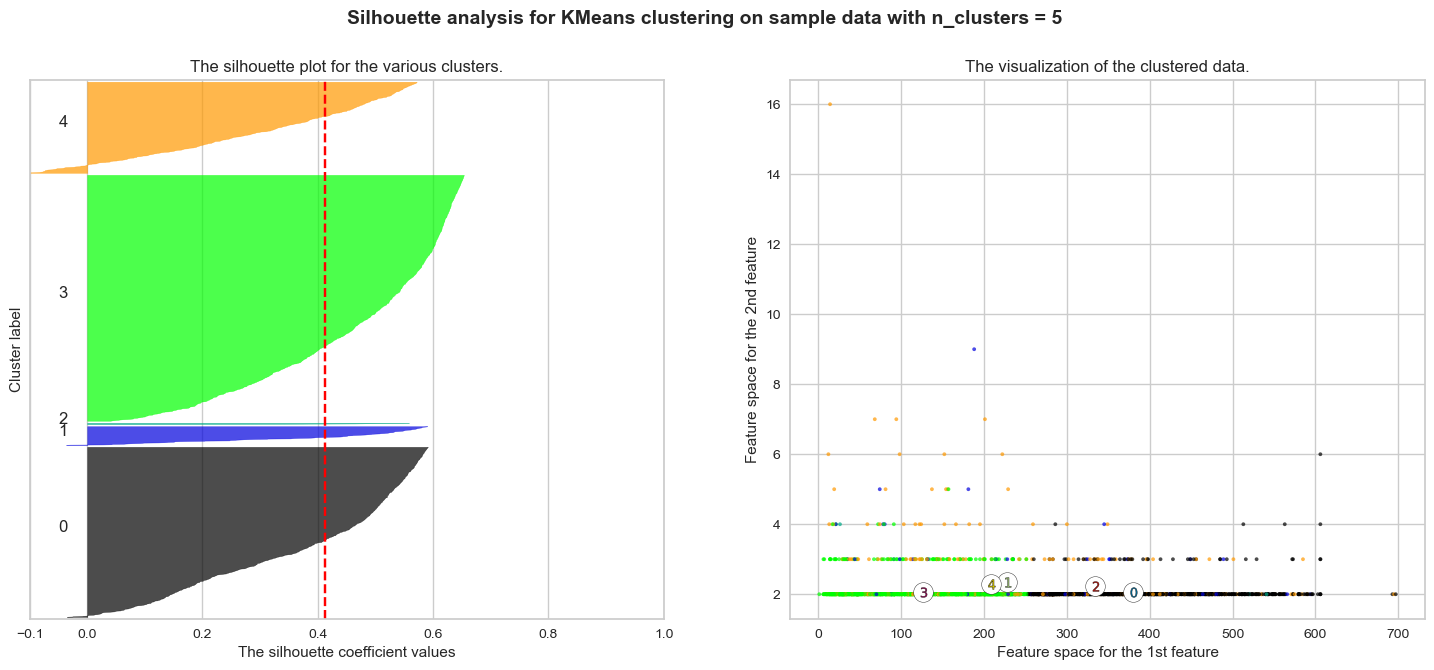

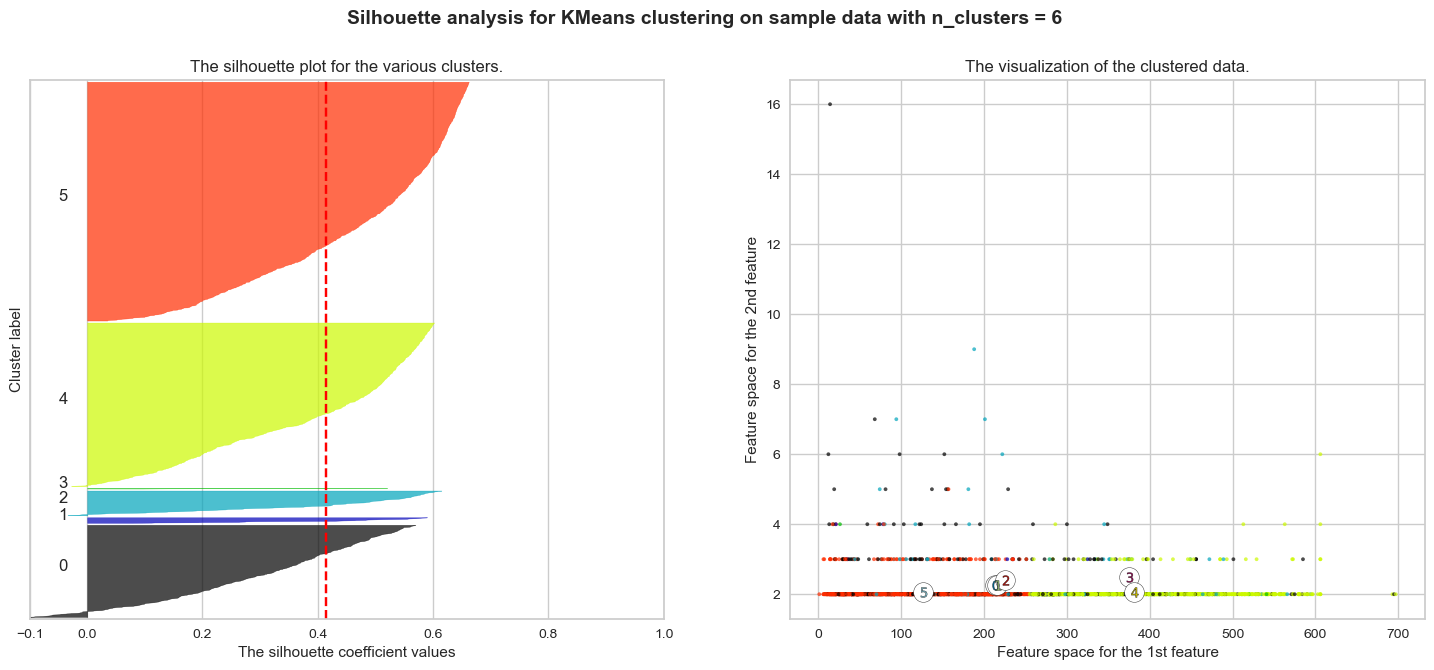

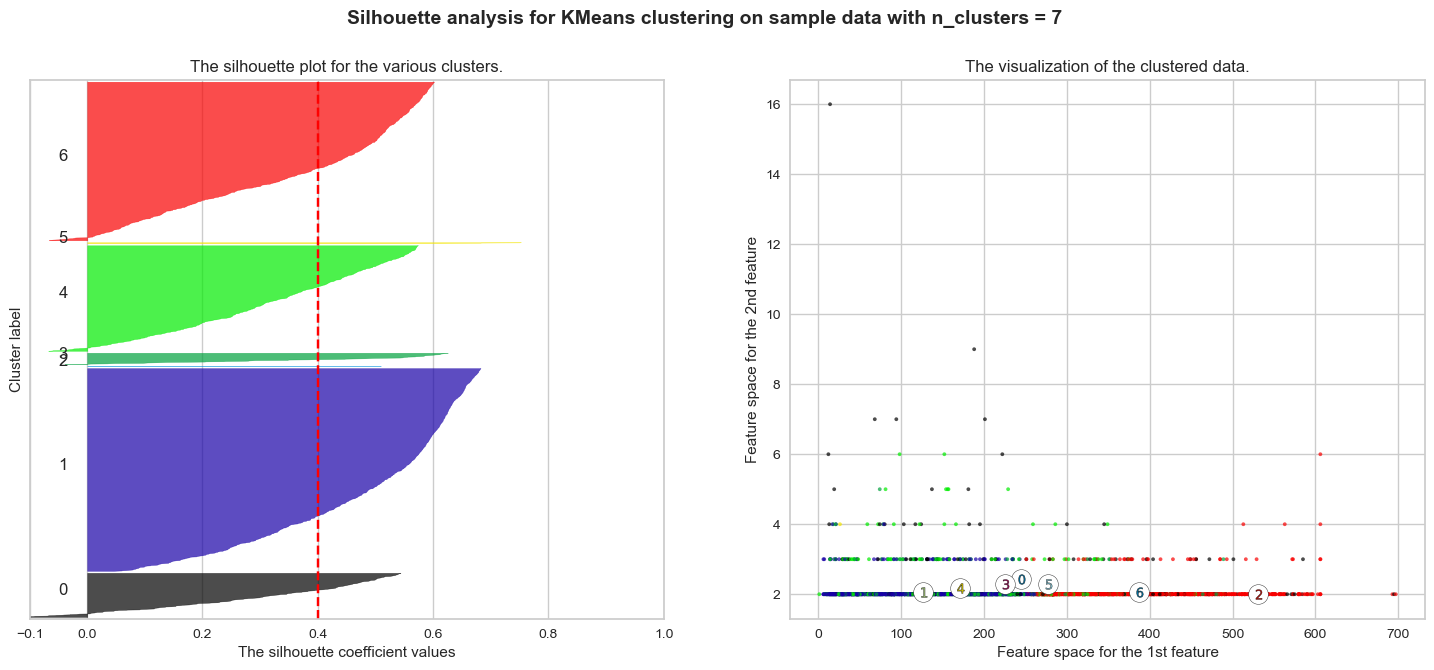

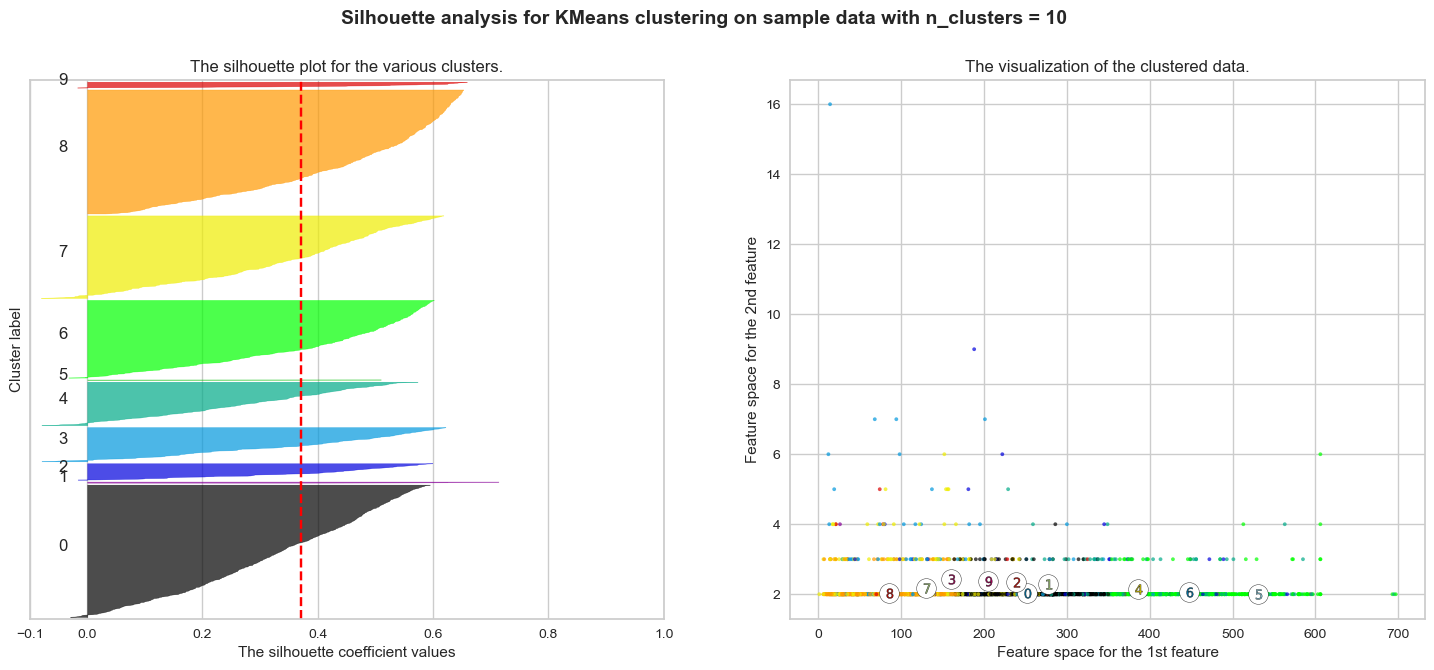

<IPython.core.display.Javascript object>

In [60]:
for n_clusters in range_n_clusters:
    # Créer un sous-graphe avec 1 ligne et 2 colonnes
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])

    #  La valeur (n_clusters+1)*10 sert à insérer des espaces vides entre les silhouettes
    #  Graphe des clusters individuelles, afin de les délimiter clairement.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialiser le clusterer avec la valeur n_clusters et un générateur aléatoire
    algo = KMeans(n_clusters=n_clusters)
    cluster_labels = algo.fit_predict(X)

    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Calcule les scores de silhouette pour chaque échantillon
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agréger les scores de silhouette pour les échantillons appartenant au cluster  i et les trier
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Identifiez les silhouettes par leur numéro de cluster au milieu
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcule du nouvelle y_lower pour le nouveau graphe
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # La ligne verticale représente la moyenne des scores de silhouette de toutes les valeurs
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Efface les labels / ticks de l'axe des ordonnées
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2ème graphique montrant les clusters réellement formées
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Label des clusters
    centers = algo.cluster_centers_

    # Tracer des cercles blancs au centre des clusters
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Le nombre de clusters optimale k (appelé n_clusters) est 7 d'après les 3 méthodes

# 5. Clusterisation avec k-means rfm

## 5.1 Clusterisation avec k-means rfm

Maintenant que nous avons le nombre de cluster optimal, soit 7, nous allons pouvoir appliquer la méthode de k-means

In [61]:
Tableau_rfm2_kmeans = Tableau_rfm2[cols_rfm].copy()  # creation d'une copy

<IPython.core.display.Javascript object>

In [62]:
k_means = KMeans(n_clusters=7)  # création du modèle

<IPython.core.display.Javascript object>

In [63]:
k_means.fit(RFM_scaled_df)  # application du modèle sur les variables normalisées
label = k_means.labels_  # labels des cluster /segmentation

<IPython.core.display.Javascript object>

In [64]:
Tableau_rfm2_kmeans[
    "Cluster"
] = k_means.labels_  # ajout de la colonne cluster dans notre table RFM
Tableau_rfm2_kmeans

,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,
004288347e5e88a27ded2bb23747066c,233,2,317.89,0
004b45ec5c64187465168251cd1c9c2f,100,2,86.90,1
0058f300f57d7b93c477a131a59b36c3,165,2,205.06,0
00a39521eb40f7012db50455bf083460,92,2,81.45,1
00cc12a6d8b578b8ebd21ea4e2ae8b27,531,2,199.60,4
...,...,...,...,...
ff22e30958c13ffe219db7d711e8f564,1,2,290.00,1
ff44401d0d8f5b9c54a47374eb48c1b8,472,2,79.60,4
ff8892f7c26aa0446da53d01b18df463,281,2,327.90,0


<IPython.core.display.Javascript object>

Nous avons ainsi un tableau avec une colonne cluster. Chaque valeur de cluster correspond à un segment. Nous avons ainsi un tableau segmenté. Cependant, il faut définir les clusters par un nom. Afin résoudre ce problème nous allons réaliser un tableau de valeur moyenne par cluster. Puis, nous allons comparer le tableau crée avec la valeur moyenne de chaque variable correspondant. 

In [65]:
# Réalisation d'un tableau statitique dont l'index est le numero de cluster
Tableau_rfm_stat2 = (
    Tableau_rfm2_kmeans.groupby("Cluster")
    .agg(
        mean_recency=pd.NamedAgg("Recency", "mean"),
        mean_frequency=pd.NamedAgg("Frequency", "mean"),
        mean_monetary=pd.NamedAgg("Monetary", "mean"),
        cluster_size=pd.NamedAgg("Cluster", "count"),
    )
    .reset_index()
)
Tableau_rfm_stat2 = Tableau_rfm_stat2.round(
    {"mean_recency": 0, "mean_frequency": 1, "mean_monetary": 0}
)
Tableau_rfm_stat2 = Tableau_rfm_stat2.astype(
    {"mean_recency": "int", "mean_monetary": "int"}
)
Tableau_rfm_stat2

,Cluster,mean_recency,mean_frequency,mean_monetary,cluster_size
0,0,244,2.0,218,985
1,1,84,2.0,219,937
2,2,218,2.1,1175,145
3,3,150,6.4,657,19
4,4,441,2.0,227,586
5,5,333,2.2,4085,9
6,6,190,3.1,371,188


<IPython.core.display.Javascript object>

## 5.2 Nommer les clusters

Dans le marketing il existe différents segments qui sont :

* **Champions :** effectue des achats récents, achète souvent et dépense beaucoup

* **Loyal Customers :** achètent régulièrement

* **Potential Loyalist :** nouveaux clients avec fréquence d'achat moyenne

* **Recent Customers :** achats récents, mais peu fréquents

* **Promising :**   nouveaux acheteurs, mais peu dépensiers

* **Need Attention :** dépenses moyennes, moyennement fréquemment, achat moyennement récent

* **About to Sleep :** client qui tendent à disparaitre

* **Can't Lose Them :** achètaient régulièrement, besoin de les faire revenir

* **At Risk :** dépensaient beaucoup, achetaient souvent mais il y a longtemps

* **Lost :** peu dépensiers, peu fréquements, a acheté il y a un moment

* **Others :** pas catégorisable

In [66]:
Tableau_rfm_stat2

,Cluster,mean_recency,mean_frequency,mean_monetary,cluster_size
0,0,244,2.0,218,985
1,1,84,2.0,219,937
2,2,218,2.1,1175,145
3,3,150,6.4,657,19
4,4,441,2.0,227,586
5,5,333,2.2,4085,9
6,6,190,3.1,371,188


<IPython.core.display.Javascript object>

In [67]:
Tableau_rfm2.describe()

,Recency,Frequency,Monetary,R,F,M
count,2869.000000,2869.000000,2869.000000,2869.000000,2869.0,2869.000000
mean,226.544441,2.113977,293.386086,3.001743,1.0,3.055769
std,144.943053,0.509919,356.254596,1.415322,0.0,1.376364
min,1.000000,2.000000,17.970000,1.000000,1.0,1.000000
25%,110.000000,2.000000,119.800000,2.000000,1.0,2.000000
50%,205.000000,2.000000,199.600000,3.000000,1.0,3.000000
75%,326.000000,2.000000,333.970000,4.000000,1.0,4.000000
max,697.000000,16.000000,7388.000000,5.000000,1.0,5.000000


<IPython.core.display.Javascript object>

Afin de déterminer nos différents segments nous allons réaliser une fonction, ainsi il sera plus facile de les nommer.

In [68]:
def segmentCluster(rfm):
    if (
        rfm["mean_recency"] < 205
        and 5 <= rfm["mean_frequency"]
        and rfm["mean_monetary"] > 333
    ):
        return "Champions"

    elif 5 <= rfm["mean_frequency"]:
        return "Loyal Customers"

    elif (
        rfm["mean_recency"] <= 110
        and 2 <= rfm["mean_frequency"] <= 4
        and 119 < rfm["mean_monetary"] < 334
    ):
        return "Potential Loyalist"

    elif (
        rfm["mean_recency"] <= 205
        and 2 < rfm["mean_frequency"] < 3
        and 334 < rfm["mean_monetary"]
    ):
        return "Recent Customers"

    elif (
        rfm["mean_recency"] <= 326
        and 3 > rfm["mean_frequency"]
        and rfm["mean_monetary"] <= 334
    ):
        return "Promising"

    elif (
        110 <= rfm["mean_recency"] <= 326
        and 2 <= rfm["mean_frequency"] <= 5
        and 119 <= rfm["mean_monetary"] <= 400
    ):
        return "Need Attention"

    elif 365 <= rfm["mean_recency"]:
        return "About to Sleep"

    elif (
        rfm["mean_recency"] > 300
        and 2 <= rfm["mean_frequency"] <= 5
        and 400 <= rfm["mean_monetary"]
    ):
        return "Can't Lose Them"

    elif (
        rfm["mean_recency"] >= 333
        and 2 <= rfm["mean_frequency"]
        and rfm["mean_monetary"] >= 400
    ):
        return "At Risk"

    elif (
        rfm["mean_recency"] >= 205
        and rfm["mean_frequency"] <= 2
        and rfm["mean_monetary"] <= 293
    ):
        return "Lost"

    else:
        return "Others"

<IPython.core.display.Javascript object>

Nous obtenons le nom des clusters que nous insérerons dans notre table

In [69]:
Tableau_rfm_stat2["Segment"] = Tableau_rfm_stat2.apply(segmentCluster, axis=1)
Tableau_segment = Tableau_rfm_stat2  # l'ajout de la colonne segment

<IPython.core.display.Javascript object>

In [70]:
Tableau_segment.set_index(
    "Segment", inplace=True
)  # changement d'index par groupe de segement
Tableau_segment  # tableau finale

,Cluster,mean_recency,mean_frequency,mean_monetary,cluster_size
Segment,,,,,
Promising,0,244,2.0,218,985
Potential Loyalist,1,84,2.0,219,937
Others,2,218,2.1,1175,145
Champions,3,150,6.4,657,19
About to Sleep,4,441,2.0,227,586
Can't Lose Them,5,333,2.2,4085,9
Need Attention,6,190,3.1,371,188


<IPython.core.display.Javascript object>

In [71]:
# nombre de client par segment
cluster_size = Tableau_segment["cluster_size"].sort_values(ascending=True)
cluster_size

Segment
Can't Lose Them         9
Champions              19
Others                145
Need Attention        188
About to Sleep        586
Potential Loyalist    937
Promising             985
Name: cluster_size, dtype: int64

<IPython.core.display.Javascript object>

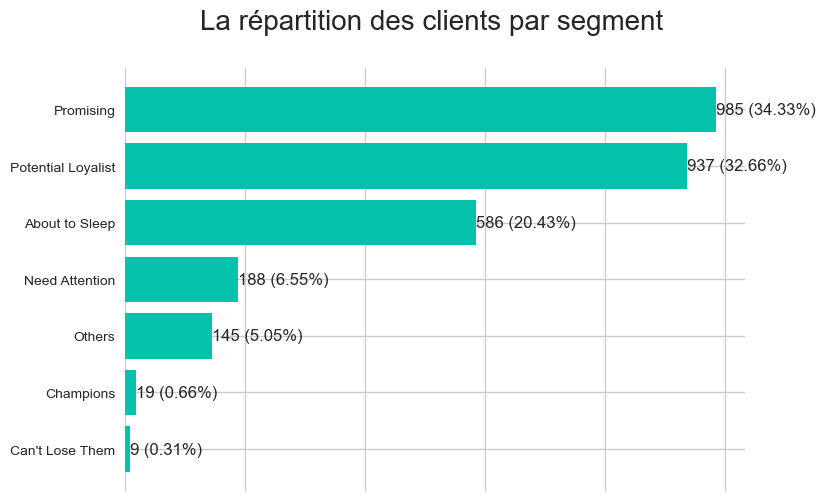

<IPython.core.display.Javascript object>

In [72]:
# graphe du nombre de client par segment
fig, ax = plt.subplots()

bars = ax.barh(range(len(cluster_size)), cluster_size, color="#06C2AC")
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(cluster_size)))
ax.set_yticklabels(cluster_size.index)

for i, bar in enumerate(bars):
    value = bar.get_width()

    ax.text(
        value,
        bar.get_y() + bar.get_height() / 2,
        "{:,} ({:}%)".format(
            int(value), float(round(value * 100 / cluster_size.sum(), 2))
        ),
        va="center",
        ha="left",
    )

plt.title("La répartition des clients par segment \n", fontsize=20)

plt.show()

Nous avons bien réalisé notre segmentation avec les méthodes RFM et le k-means.

# 6. DBScan

DBScan est un algorithme de clustering permettant de former des clusters de point connecté par densité

In [73]:
B = RFM_scaled_df
db = DBSCAN(eps=0.3, min_samples=10).fit(B)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 210


<IPython.core.display.Javascript object>

Nous remarquons que le nombre de n_clusters entre le DBScan et les 3 autres méthodes de détermination du n_clusters différent. Par conséquent nous pouvons déduire que l'algorithme DBScan ne fonctionne pas dans notre cas.

# 7. Clusterisation avec k-means rfm++

Dans cette partie nous allons réaliser la même méthode que celle précédente, RFM avec k-means. Néanmoins afin d'obtenir une meilleur segmentation nous allons indroduire de nouvelles variables.

## 7.1 Le choix des variables en plus

Afin de choisir nos nouvelles variables à introduire dans le clustering, nous allons rappeler notre data_total avec toutes les colonnes présentes.

In [74]:
data_total.head(2)  # rappel du grand data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,credit_card,8,335.48


<IPython.core.display.Javascript object>

In [75]:
data_total.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

<IPython.core.display.Javascript object>

Nous avons choisi les variables suivantes :
* le nombre d'articles commandés : 'order_item_id'  
* les frais livraisons : 'freight_value'
* la note du commentaire : 'review_score'
* le nombre de versement paiement : 'payment_installments'

## 7.2 Création du data de toutes nos colonnes introduite

Afin de facilité la création de notre data final nous allons réaliser un data intermédiaire que nous appelerons *data-plus*,  ce data contiendra les colonnes à introduire dans notre data final pour notre analyse.

In [76]:
# On récupère les variables qui paraissent les plus intéressantes
data_plus = data_total[
    [
        "customer_unique_id",
        "order_item_id",
        "freight_value",
        "review_score",
        "payment_installments",
    ]
]

<IPython.core.display.Javascript object>

In [77]:
data_plus.head(2)

,customer_unique_id,order_item_id,freight_value,review_score,payment_installments
0,861eff4711a542e4b93843c6dd7febb0,1,21.88,4,2
1,290c77bc529b7ac935b93aa66c333dc3,1,46.48,5,8


<IPython.core.display.Javascript object>

In [78]:
# Création d'un tableau RFM avec 'customer_unique_id' comme index et application des formules
data_plus = data_plus.groupby("customer_unique_id").agg(
    {
        "order_item_id": lambda x: sum(x),  # nbr d'article commandé
        "freight_value": lambda x: x.mean(),  # frais de livraison moyen
        "review_score": lambda x: x.mean(),  # la note moyenne
        "payment_installments": lambda x: x.mean(),  # nombre de versement moyen
    }
)


# le nom des colonnes
data_plus.rename(
    columns={
        "order_item_id": "nbr order_item_id ",
        "freight_value": "freight_value mean",
        "review_score": "review_score mean",
        "payment_installments": "payment_installments mean",
    },
    inplace=True,
)
data_plus

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,12.00,5.0,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,8.29,4.0,1.0
0000f46a3911fa3c0805444483337064,1,17.22,3.0,8.0
0000f6ccb0745a6a4b88665a16c9f078,1,17.63,4.0,4.0
0004aac84e0df4da2b147fca70cf8255,1,16.89,5.0,6.0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,3,248.71,5.0,10.0
fffea47cd6d3cc0a88bd621562a9d061,1,19.69,4.0,1.0
ffff371b4d645b6ecea244b27531430a,1,22.56,5.0,1.0


<IPython.core.display.Javascript object>

In [79]:
data_plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94720 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nbr order_item_id          94720 non-null  int64  
 1   freight_value mean         94720 non-null  float64
 2   review_score mean          94720 non-null  float64
 3   payment_installments mean  94720 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.6+ MB


<IPython.core.display.Javascript object>

## 7.3. Création du Data à utiliser pour notre clustering

Nous allons rassembler le data Tableau_rfm2, utilisé dans la partie précédente, et le data intermédiaire afin de créer le data que nous explorerons pour notre clustering k-means

In [80]:
Tableau_rfmPlus = data_plus.merge(Tableau_rfm2, on="customer_unique_id")
Tableau_rfmPlus.head(2)

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean,Recency,Frequency,Monetary,R,F,M,Segment
customer_unique_id,,,,,,,,,,,
004288347e5e88a27ded2bb23747066c,2,18.24,5.0,2.0,233,2,317.89,3,1,4,Others
004b45ec5c64187465168251cd1c9c2f,2,30.41,3.0,1.0,100,2,86.90,4,1,1,Potential Loyalist


<IPython.core.display.Javascript object>

In [81]:
Tableau_rfmPlus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2869 entries, 004288347e5e88a27ded2bb23747066c to ffe254cc039740e17dd15a5305035928
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nbr order_item_id          2869 non-null   int64  
 1   freight_value mean         2869 non-null   float64
 2   review_score mean          2869 non-null   float64
 3   payment_installments mean  2869 non-null   float64
 4   Recency                    2869 non-null   int64  
 5   Frequency                  2869 non-null   int64  
 6   Monetary                   2869 non-null   float64
 7   R                          2869 non-null   int64  
 8   F                          2869 non-null   int64  
 9   M                          2869 non-null   int64  
 10  Segment                    2869 non-null   object 
dtypes: float64(4), int64(6), object(1)
memory usage: 269.0+ KB


<IPython.core.display.Javascript object>

Nous avons aucune valeur manquante. De plus, nous pouvons constater que certaines colonnes (R, F, M et Segment) sont inutiles pour la suite. De surcroît, nous devons les supprimer.

In [82]:
Tableau_rfmPlus = Tableau_rfmPlus.drop(["R", "F", "M", "Segment"], axis=1)
Tableau_rfmPlus.head(2)

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean,Recency,Frequency,Monetary
customer_unique_id,,,,,,,
004288347e5e88a27ded2bb23747066c,2,18.24,5.0,2.0,233,2,317.89
004b45ec5c64187465168251cd1c9c2f,2,30.41,3.0,1.0,100,2,86.90


<IPython.core.display.Javascript object>

Nous avons ainsi notre data finale pour le clustering

# 8.  Initiation du Clustering

## 8.1 Normalisation

In [83]:
Tableau_rfmPlus.columns  # colonnes du data

Index(['nbr order_item_id ', 'freight_value mean', 'review_score mean',
       'payment_installments mean', 'Recency', 'Frequency', 'Monetary'],
      dtype='object')

<IPython.core.display.Javascript object>

In [84]:
cols_rfmPlus = Tableau_rfmPlus.columns  # les colonnes concernées

<IPython.core.display.Javascript object>

In [85]:
scaler = StandardScaler()  # normaliser
scaler.fit(Tableau_rfmPlus[cols_rfmPlus])
RFM_scaledPlus = scaler.fit_transform(Tableau_rfmPlus[cols_rfmPlus])

<IPython.core.display.Javascript object>

In [86]:
RFM_scaledPlus = pd.DataFrame(
    RFM_scaledPlus
)  # création d'un data avec nous valeur standariser
RFM_scaledPlus.columns = cols_rfmPlus
RFM_scaledPlus.head(3)

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean,Recency,Frequency,Monetary
0,-0.293851,-0.071511,0.759935,-0.486377,0.044546,-0.223559,0.068794
1,-0.293851,1.093563,-1.021489,-0.859040,-0.873215,-0.223559,-0.579704
2,-0.131349,0.305678,-0.427681,-0.859040,-0.424685,-0.223559,-0.247973


<IPython.core.display.Javascript object>

In [87]:
Tableau_rfmPlus.head(3)  # rappel de la table

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean,Recency,Frequency,Monetary
customer_unique_id,,,,,,,
004288347e5e88a27ded2bb23747066c,2,18.24,5.000000,2.0,233,2,317.89
004b45ec5c64187465168251cd1c9c2f,2,30.41,3.000000,1.0,100,2,86.90
0058f300f57d7b93c477a131a59b36c3,3,22.18,3.666667,1.0,165,2,205.06


<IPython.core.display.Javascript object>

## 8.2 Clusterisation avec k-means trouver le meilleur k KElbowVisualizer

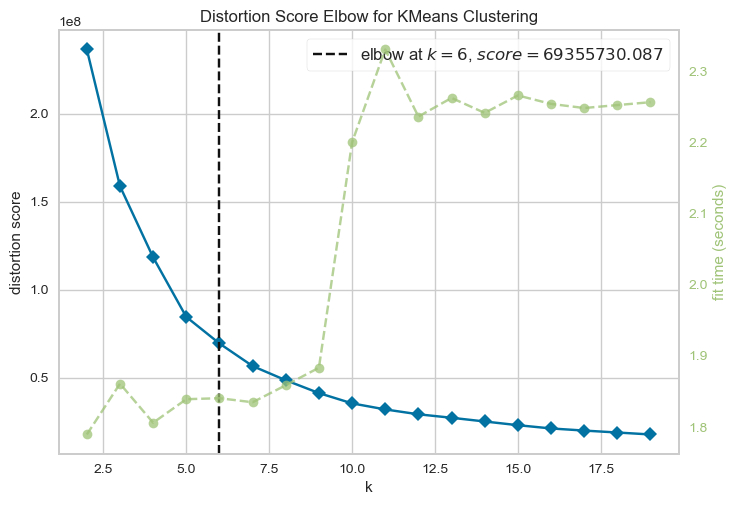

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [88]:
algo = KMeans()
elbow = KElbowVisualizer(algo, k=(2, 20))
elbow.fit(Tableau_rfmPlus[cols_rfmPlus])
elbow.show()

Le nombre de cluster (n_cluster optimal) est 6

##  8.3 Clusterisation avec k-means rfm++

In [89]:
k_means = KMeans(n_clusters=6)
k_means.fit(RFM_scaledPlus)
label = k_means.labels_
Tableau_rfmPlus["Cluster"] = k_means.labels_
Tableau_rfmPlus

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,,,,,
004288347e5e88a27ded2bb23747066c,2,18.240000,5.000000,2.000000,233,2,317.89,0
004b45ec5c64187465168251cd1c9c2f,2,30.410000,3.000000,1.000000,100,2,86.90,2
0058f300f57d7b93c477a131a59b36c3,3,22.180000,3.666667,1.000000,165,2,205.06,0
00a39521eb40f7012db50455bf083460,2,20.900000,4.000000,1.000000,92,2,81.45,0
00cc12a6d8b578b8ebd21ea4e2ae8b27,4,13.200000,4.000000,1.000000,531,2,199.60,1
...,...,...,...,...,...,...,...,...
ff22e30958c13ffe219db7d711e8f564,2,21.460000,1.000000,3.500000,1,2,290.00,2
ff44401d0d8f5b9c54a47374eb48c1b8,4,14.100000,3.000000,1.000000,472,2,79.60,1
ff8892f7c26aa0446da53d01b18df463,3,22.993333,2.666667,7.333333,281,2,327.90,2


<IPython.core.display.Javascript object>

## 8.4 Nommer les clusters

***RAPPEL*** Dans le marketing il existe différents segments qui sont :

* **Champions :** effectue des achats récents, achète souvent et dépense beaucoup

* **Loyal Customers :** achètent régulièrement

* **Potential Loyalist :** nouveaux clients avec fréquence d'achat moyenne

* **Recent Customers :** achats récents, mais peu fréquents

* **Promising :**   nouveaux acheteurs, mais peu dépensiers

* **Need Attention :** dépenses moyennes, moyennement fréquemment, achat moyennement récent

* **About to Sleep :** client qui tendent à disparaitre

* **Can't Lose Them :** achètaient régulièrement, besoin de les faire revenir

* **At Risk :** dépensaient beaucoup, achetaient souvent mais il y a longtemps

* **Lost :** peu dépensiers, peu fréquements, a acheté il y a un moment

* **Others :** pas catégorisable

In [90]:
# Réalisation d'un tableau statitique dont l'index est le numero de cluster
Tableau_rfmPlus2 = Tableau_rfmPlus.groupby("Cluster").agg(
    mean_recency=pd.NamedAgg("Recency", "mean"),
    mean_frequency=pd.NamedAgg("Frequency", "mean"),
    mean_monetary=pd.NamedAgg("Monetary", "mean"),
    cluster_size=pd.NamedAgg("Cluster", "count"),
)
Tableau_rfmPlus2 = Tableau_rfmPlus2.round(
    {"mean_recency": 0, "mean_frequency": 1, "mean_monetary": 0}
)
Tableau_rfmPlus2 = Tableau_rfmPlus2.astype(
    {"mean_recency": "int", "mean_monetary": "int"}
)
Tableau_rfmPlus2

,mean_recency,mean_frequency,mean_monetary,cluster_size
Cluster,,,,
0,120,2.1,218,1213
1,378,2.1,222,842
2,238,2.0,277,499
3,157,5.0,635,46
4,282,2.3,2839,6
5,219,2.1,785,263


<IPython.core.display.Javascript object>

In [91]:
Tableau_rfmPlus2.describe()

,mean_recency,mean_frequency,mean_monetary,cluster_size
count,6.000000,6.00000,6.000000,6.000000
mean,232.333333,2.60000,829.333333,478.166667
std,91.857861,1.17983,1012.535958,475.140997
min,120.000000,2.00000,218.000000,6.000000
25%,172.500000,2.10000,235.750000,100.250000
50%,228.500000,2.10000,456.000000,381.000000
75%,271.000000,2.25000,747.500000,756.250000
max,378.000000,5.00000,2839.000000,1213.000000


<IPython.core.display.Javascript object>

In [92]:
def segmentCluster2(rfm):
    if (
        rfm["mean_recency"] <= 170
        and 4 <= rfm["mean_frequency"]
        and rfm["mean_monetary"] > 662
    ):
        return "Champions"

    elif 4 <= rfm["mean_frequency"]:
        return "Loyal Customers"

    elif (
        rfm["mean_recency"] <= 170
        and 2 <= rfm["mean_frequency"] <= 3
        and 235 < rfm["mean_monetary"] < 663
    ):
        return "Potential Loyalist"

    elif (
        rfm["mean_recency"] <= 224
        and 2 < rfm["mean_frequency"] < 3
        and 455 < rfm["mean_monetary"]
    ):
        return "Recent Customers"

    elif rfm["mean_recency"] <= 224 and rfm["mean_monetary"] <= 454:
        return "Promising"

    elif (
        rfm["mean_recency"] <= 224
        and 2 <= rfm["mean_frequency"] <= 5
        and 236 <= rfm["mean_monetary"] <= 663
    ):
        return "Need Attention"

    elif 365 <= rfm["mean_recency"]:
        return "About to Sleep"

    elif (
        rfm["mean_recency"] > 300
        and 2 <= rfm["mean_frequency"] <= 5
        and 400 <= rfm["mean_monetary"]
    ):
        return "Can't Lose Them"

    elif (
        rfm["mean_recency"] >= 240
        and 2 <= rfm["mean_frequency"]
        and rfm["mean_monetary"] >= 663
    ):
        return "At Risk"

    elif (
        rfm["mean_recency"] <= 240
        and rfm["mean_frequency"] <= 2
        and rfm["mean_monetary"] <= 455
    ):
        return "Lost"

    else:
        return "Others"

<IPython.core.display.Javascript object>

In [93]:
Tableau_rfmPlus2["Segment"] = Tableau_rfmPlus2.apply(segmentCluster2, axis=1)
Tableau_rfmPlus2["Segment"]

Cluster
0           Promising
1      About to Sleep
2                Lost
3     Loyal Customers
4             At Risk
5    Recent Customers
Name: Segment, dtype: object

<IPython.core.display.Javascript object>

In [94]:
Tableau_rfmPlus2.set_index("Segment", inplace=True)  # changement d'index
Tableau_rfmPlus2

,mean_recency,mean_frequency,mean_monetary,cluster_size
Segment,,,,
Promising,120,2.1,218,1213
About to Sleep,378,2.1,222,842
Lost,238,2.0,277,499
Loyal Customers,157,5.0,635,46
At Risk,282,2.3,2839,6
Recent Customers,219,2.1,785,263


<IPython.core.display.Javascript object>

In [95]:
# nombre de client par segment
cluster_size2 = Tableau_rfmPlus2["cluster_size"].sort_values(ascending=True)
cluster_size2

Segment
At Risk                6
Loyal Customers       46
Recent Customers     263
Lost                 499
About to Sleep       842
Promising           1213
Name: cluster_size, dtype: int64

<IPython.core.display.Javascript object>

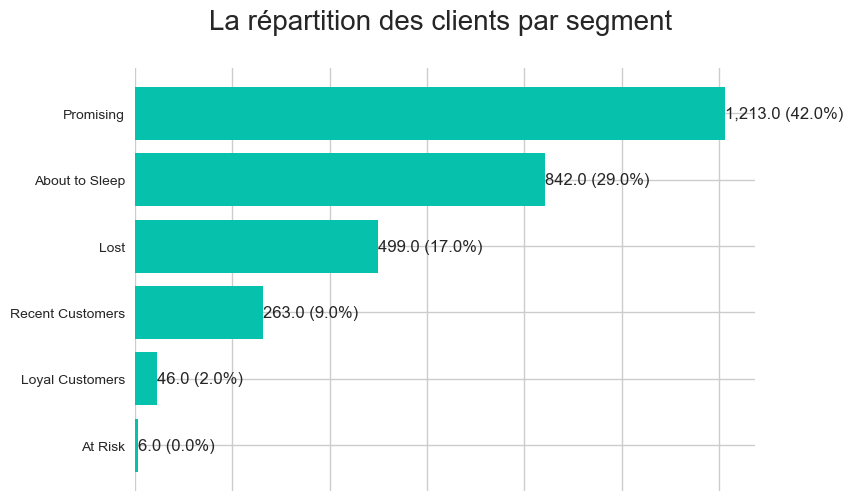

<IPython.core.display.Javascript object>

In [96]:
# graphe du nombre de client par segment
fig, ax = plt.subplots()

bars = ax.barh(range(len(cluster_size2)), cluster_size2, color="#06C2AC")
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(cluster_size2)))
ax.set_yticklabels(cluster_size2.index)

for i, bar in enumerate(bars):
    value = bar.get_width()

    ax.text(
        value,
        bar.get_y() + bar.get_height() / 2,
        "{:,} ({:}%)".format(
            float(value), float(round(value * 100 / cluster_size2.sum())), 2
        ),
        va="center",
        ha="left",
    )

plt.title("La répartition des clients par segment \n", fontsize=20)
plt.show()

# 9. DBSCan

In [98]:
A = RFM_scaledPlus
db2 = DBSCAN(eps=0.3, min_samples=10).fit(A)
labels = db2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 2597


<IPython.core.display.Javascript object>

# 10. PCA Réduction dimensionnelle 

Nous allons réaliser une Analyse en composantes principales (ACP). L'ACP permet d'avoir une meilleur exploration du data multidimensionnels en se basant sur les variables sont quantitatives. En outre, ACP crée un changement de base. En d'autres termes elle permet de transformer des variables corrélées en variables décorrélées appelées "composantes principales". Par conséquent, cette méthode permet de réduire le nombre de variables appliquées à des individus, pour simplifier les observations tout en conservant un maximum d’informations.

## 10.1 Création de la table pour la PCA 

In [99]:
Tableau_rfmPlus

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,,,,,
004288347e5e88a27ded2bb23747066c,2,18.240000,5.000000,2.000000,233,2,317.89,0
004b45ec5c64187465168251cd1c9c2f,2,30.410000,3.000000,1.000000,100,2,86.90,2
0058f300f57d7b93c477a131a59b36c3,3,22.180000,3.666667,1.000000,165,2,205.06,0
00a39521eb40f7012db50455bf083460,2,20.900000,4.000000,1.000000,92,2,81.45,0
00cc12a6d8b578b8ebd21ea4e2ae8b27,4,13.200000,4.000000,1.000000,531,2,199.60,1
...,...,...,...,...,...,...,...,...
ff22e30958c13ffe219db7d711e8f564,2,21.460000,1.000000,3.500000,1,2,290.00,2
ff44401d0d8f5b9c54a47374eb48c1b8,4,14.100000,3.000000,1.000000,472,2,79.60,1
ff8892f7c26aa0446da53d01b18df463,3,22.993333,2.666667,7.333333,281,2,327.90,2


<IPython.core.display.Javascript object>

In [100]:
pca_data = Tableau_rfmPlus[Tableau_rfmPlus["Cluster"].notna()].copy()

<IPython.core.display.Javascript object>

In [101]:
pca_data.columns  # rappel de des colonnes du dataframe

Index(['nbr order_item_id ', 'freight_value mean', 'review_score mean',
       'payment_installments mean', 'Recency', 'Frequency', 'Monetary',
       'Cluster'],
      dtype='object')

<IPython.core.display.Javascript object>

In [102]:
pca_data

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,,,,,
004288347e5e88a27ded2bb23747066c,2,18.240000,5.000000,2.000000,233,2,317.89,0
004b45ec5c64187465168251cd1c9c2f,2,30.410000,3.000000,1.000000,100,2,86.90,2
0058f300f57d7b93c477a131a59b36c3,3,22.180000,3.666667,1.000000,165,2,205.06,0
00a39521eb40f7012db50455bf083460,2,20.900000,4.000000,1.000000,92,2,81.45,0
00cc12a6d8b578b8ebd21ea4e2ae8b27,4,13.200000,4.000000,1.000000,531,2,199.60,1
...,...,...,...,...,...,...,...,...
ff22e30958c13ffe219db7d711e8f564,2,21.460000,1.000000,3.500000,1,2,290.00,2
ff44401d0d8f5b9c54a47374eb48c1b8,4,14.100000,3.000000,1.000000,472,2,79.60,1
ff8892f7c26aa0446da53d01b18df463,3,22.993333,2.666667,7.333333,281,2,327.90,2


<IPython.core.display.Javascript object>

## 10.2 L'analyse de ACP

Maintenant que nous avons notre jeu de donnée, nous pouvons passer à la analyse de ACP.

In [103]:
cols_num = pca_data.select_dtypes(include=np.number).columns
cols_num

Index(['nbr order_item_id ', 'freight_value mean', 'review_score mean',
       'payment_installments mean', 'Recency', 'Frequency', 'Monetary',
       'Cluster'],
      dtype='object')

<IPython.core.display.Javascript object>

In [104]:
X = pca_data[cols_num].values  # change de variable


scaler = StandardScaler()  # normalisation
scaler.fit(X)
X_scaled = scaler.transform(X)

# creation DataFrame :
X_scaled = pd.DataFrame(X_scaled, columns=cols_num)

# On peut appliquer la méthode .describe() et .round()
X_scaled.describe().round(2)

,nbr order_item_id,freight_value mean,review_score mean,payment_installments mean,Recency,Frequency,Monetary,Cluster
count,2869.00,2869.00,2869.00,2869.00,2869.00,2869.00,2869.00,2869.00
mean,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.29,-1.82,-2.80,-0.86,-1.56,-0.22,-0.77,-0.79
25%,-0.29,-0.54,-0.58,-0.86,-0.80,-0.22,-0.49,-0.79
50%,-0.29,-0.24,0.46,-0.36,-0.15,-0.22,-0.26,-0.11
75%,0.03,0.16,0.76,0.63,0.69,-0.22,0.11,0.58
max,21.81,8.46,0.76,5.10,3.25,27.24,19.92,2.64


<IPython.core.display.Javascript object>

## 10.3  Diagramme l’éboulis des valeurs propres.

In [105]:
pca = decomposition.PCA().fit(X_scaled)  # acp
pca

PCA()

<IPython.core.display.Javascript object>

In [106]:
scree = (
    pca.explained_variance_ratio_
)  # paramètre renvoie un vecteur de la variance expliquée par chaque nouvelle dimension
scree.round(5)

array([0.28217, 0.15771, 0.13405, 0.1217 , 0.1069 , 0.09904, 0.06229,
       0.03615])

<IPython.core.display.Javascript object>

In [107]:
S0 = {scree[0].round(4) * 100}
S1 = {scree[1].round(4) * 100}
print(
    f"La première dimension possède {S0} % de l'information et la deuxième dimension possède {S1} % de l'information."
)

La première dimension possède {28.22} % de l'information et la deuxième dimension possède {15.770000000000001} % de l'information.


<IPython.core.display.Javascript object>

Il serait plus pertinent d'observer cette donnée sur un graphique. De surcroît, nous allons réaliser un diagramme d’éboulis. En outre ce diagramme décrit le pourcentage d’inertie totale associé à chaque axe.

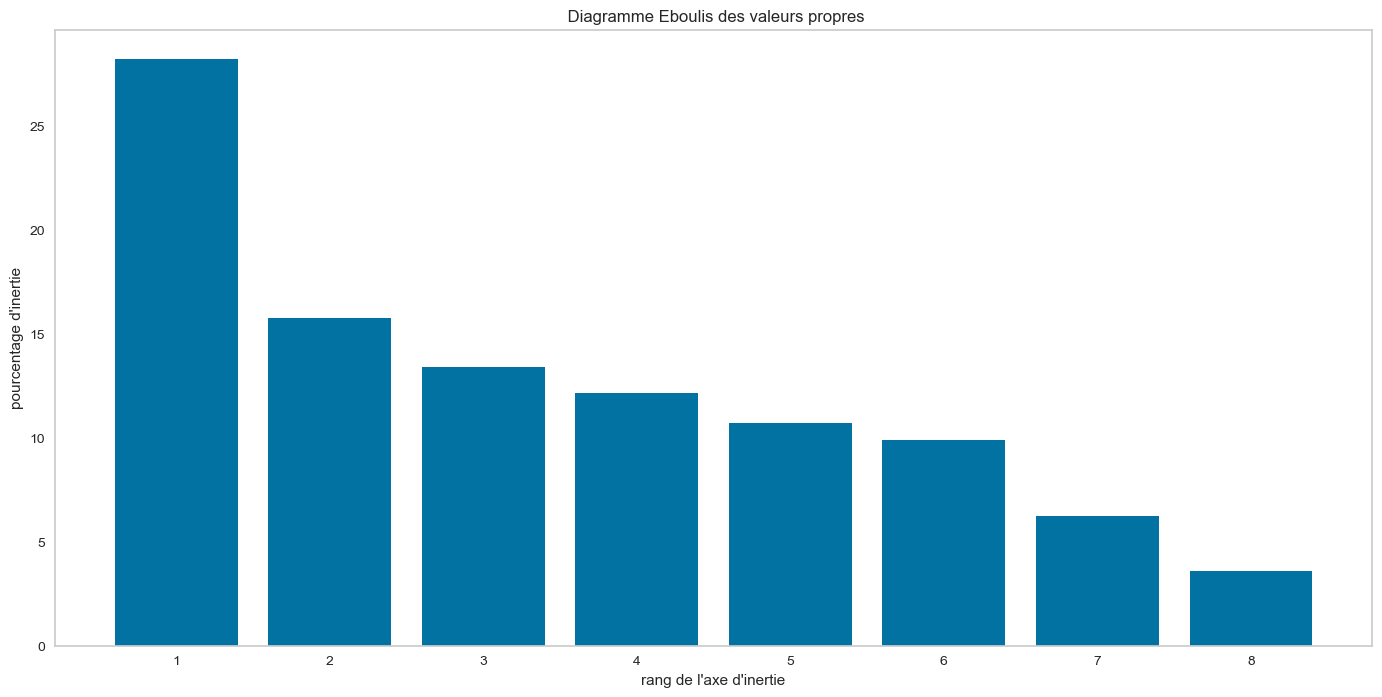

<IPython.core.display.Javascript object>

In [108]:
(fig, ax) = plt.subplots(figsize=(17, 8))
scree = pca.explained_variance_ratio_ * 100
A = ax.bar(np.arange(len(scree)) + 1, scree)

ax.set_xlabel("rang de l'axe d'inertie")
ax.set_ylabel("pourcentage d'inertie")
ax.set_title(" Diagramme Eboulis des valeurs propres")
plt.grid()
plt.show(block=False)

Nous pouvons clairement observer que les premières dimensions possédent la majorité de l'information

### Diagramme des éboulis de valeurs propres avec somme cumulée

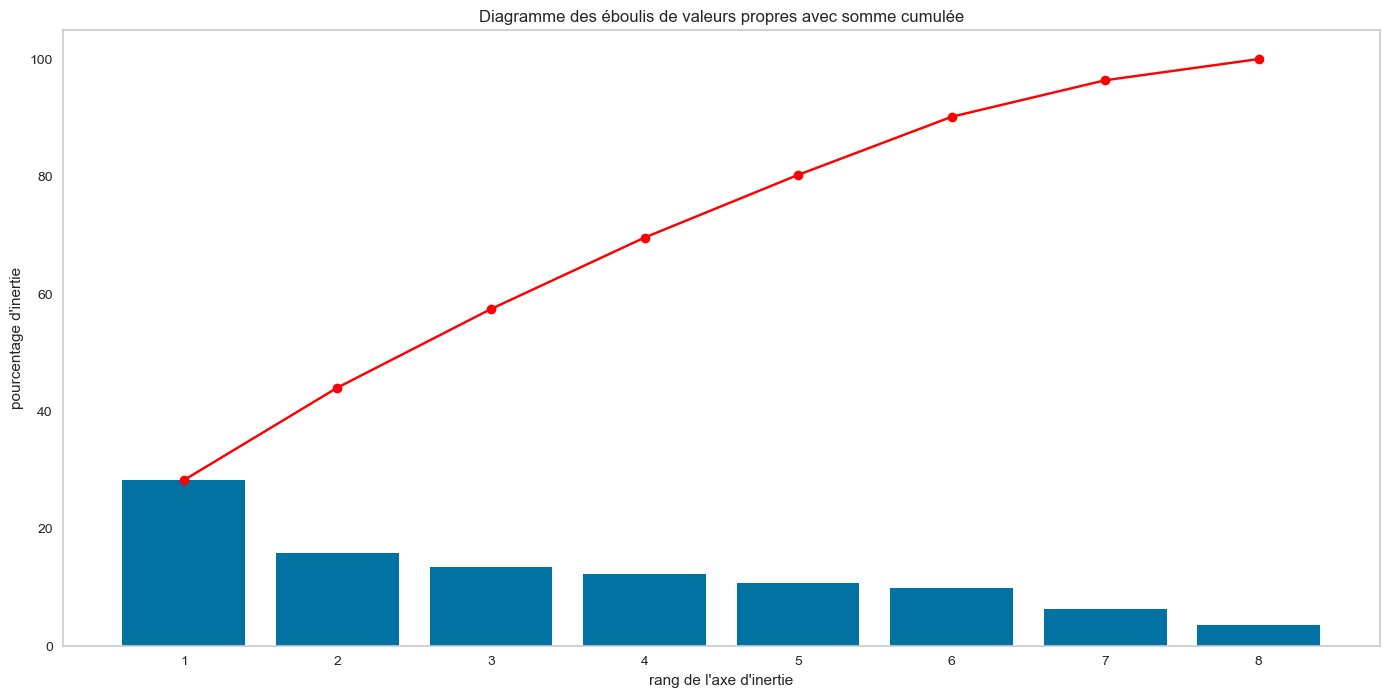

<IPython.core.display.Javascript object>

In [109]:
(fig, ax) = plt.subplots(figsize=(17, 8))
scree = pca.explained_variance_ratio_ * 100
ax.bar(np.arange(len(scree)) + 1, scree)
ax.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker="o")
ax.set_xlabel("rang de l'axe d'inertie")
ax.set_ylabel("pourcentage d'inertie")
ax.set_title("Diagramme des éboulis de valeurs propres avec somme cumulée")
plt.grid()
plt.show(block=False)

## 10.4 Cercle de corrélation dans le premier plan

In [110]:
def display_circles(
    pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None
):
    for (
        d1,
        d2,
    ) in (
        axis_ranks
    ):  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:
            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(16, 10))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = (
                    min(pcs[d1, :]),
                    max(pcs[d1, :]),
                    min(pcs[d2, :]),
                    max(pcs[d2, :]),
                )

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(
                    np.zeros(pcs.shape[1]),
                    np.zeros(pcs.shape[1]),
                    pcs[d1, :],
                    pcs[d2, :],
                    angles="xy",
                    scale_units="xy",
                    scale=1,
                    color="grey",
                )
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(
                    LineCollection(lines, axes=ax, alpha=0.1, color="black")
                )

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(
                            x,
                            y,
                            labels[i],
                            fontsize="14",
                            ha="center",
                            va="center",
                            rotation=label_rotation,
                            color="blue",
                            alpha=0.5,
                        )

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="b")
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color="grey", ls="--")
            plt.plot([0, 0], [-1, 1], color="grey", ls="--")

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel(
                "F{} ({}%)".format(
                    d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)
                )
            )
            plt.ylabel(
                "F{} ({}%)".format(
                    d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)
                )
            )

            plt.title("Cercle des corrélations (F{} et F{})".format(d1 + 1, d2 + 1))
            plt.show(block=False)

<IPython.core.display.Javascript object>

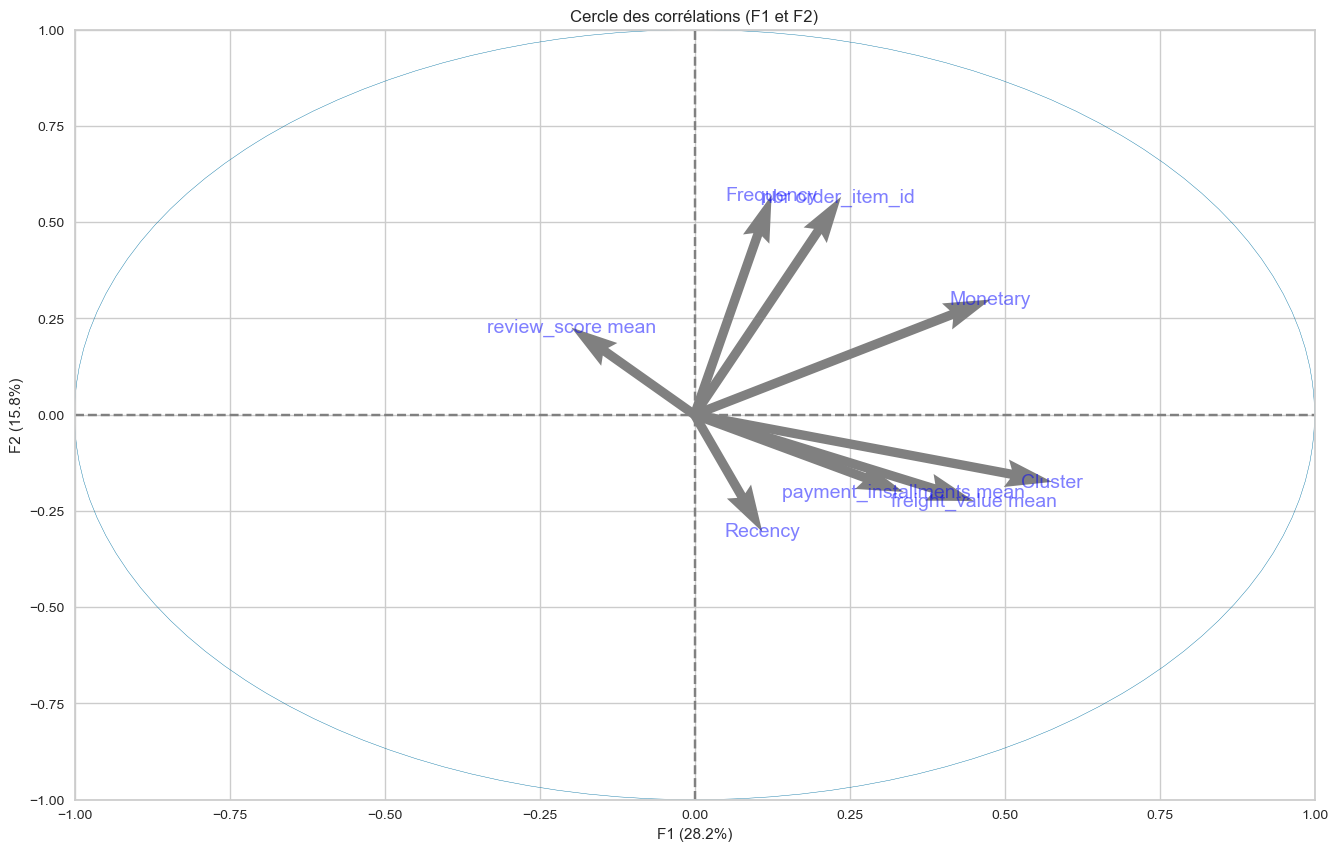

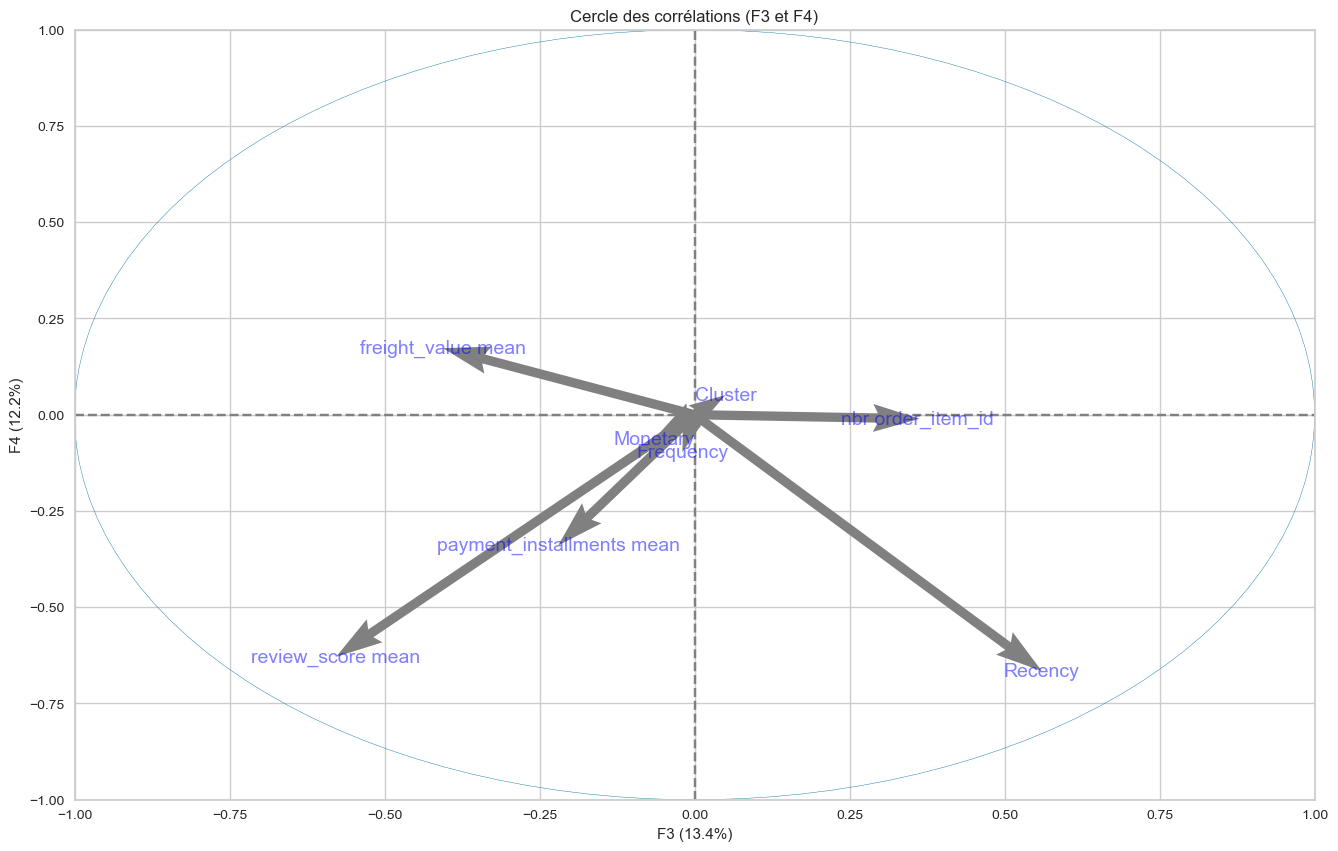

<IPython.core.display.Javascript object>

In [111]:
pcs = pca.components_
display_circles(pcs, 8, pca, [(0, 1), (2, 3)], labels=np.array(cols_num))

Avec l'aide des cercles de corrélation nous pouvons bien observer les valeurs corrélées dans cette nouvelle dimension qui se manifestent par la position du vecteur (sa norme, sa direction et son sens) par rapport aux axes. 

## 10.5 Projection des clusters dans le premier plan factoriel de notre ACP

In [112]:
X_projected = pca.transform(X_scaled)
print(X_projected.shape)
print(pca_data[cols_num].shape)
X_projected

(2869, 8)
(2869, 8)


array([[-8.64622357e-01,  1.37293233e-01, -4.24833879e-01, ...,
         5.31774527e-01,  2.40090425e-01,  2.79768493e-01],
       [ 2.70834255e-01, -6.06870412e-01, -1.88757119e-01, ...,
         6.26247204e-01, -5.69743526e-01, -7.80366044e-02],
       [-7.48316836e-01, -1.46970609e-03,  7.65264202e-03, ...,
         4.90614294e-01, -4.81804623e-02,  5.80474142e-01],
       ...,
       [ 1.30371762e+00, -1.07398614e+00,  4.66206448e-01, ...,
        -1.18593651e+00,  2.63311762e-02,  3.89098984e-01],
       [-4.18673766e-01,  7.23133552e-01,  6.10309874e-01, ...,
         3.36448233e-01, -2.80596259e-01,  9.12440716e-02],
       [-4.16948751e-01, -1.13018175e+00,  1.93836020e+00, ...,
         4.52448477e-01, -4.81736994e-02,  3.59521520e-01]])

<IPython.core.display.Javascript object>

In [113]:
cols_factorielles = ["F" + str(i) for i in range(1, X_projected.shape[1] + 1)]

<IPython.core.display.Javascript object>

In [114]:
cols_factorielles

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8']

<IPython.core.display.Javascript object>

In [115]:
projected_data = pd.DataFrame(X_projected, columns=cols_factorielles)
projected_data

,F1,F2,F3,F4,F5,F6,F7,F8
0,-0.864622,0.137293,-0.424834,-0.374827,-0.293324,0.531775,0.240090,0.279768
1,0.270834,-0.606870,-0.188757,1.795699,0.350767,0.626247,-0.569744,-0.078037
2,-0.748317,-0.001470,0.007653,0.894567,-0.114156,0.490614,-0.048180,0.580474
3,-1.121631,0.050589,-0.432687,1.045927,-0.058065,0.328287,-0.202005,0.277634
4,-0.491722,-0.541741,1.693661,-1.087793,0.153816,0.992943,0.050377,0.090944
...,...,...,...,...,...,...,...,...
2864,0.750521,-0.626891,0.563910,2.869949,0.356355,-1.007705,0.390973,0.075486
2865,-0.481128,-0.739744,1.967724,-0.220248,0.348953,0.635166,-0.112020,0.234214
2866,1.303718,-1.073986,0.466206,0.182047,0.173143,-1.185937,0.026331,0.389099
2867,-0.418674,0.723134,0.610310,-0.729437,1.656757,0.336448,-0.280596,0.091244


<IPython.core.display.Javascript object>

In [116]:
# L'ajout du cluster dans le data
projected_data["Cluster"] = pca_data["Cluster"].values
projected_data

,F1,F2,F3,F4,F5,F6,F7,F8,Cluster
0,-0.864622,0.137293,-0.424834,-0.374827,-0.293324,0.531775,0.240090,0.279768,0
1,0.270834,-0.606870,-0.188757,1.795699,0.350767,0.626247,-0.569744,-0.078037,2
2,-0.748317,-0.001470,0.007653,0.894567,-0.114156,0.490614,-0.048180,0.580474,0
3,-1.121631,0.050589,-0.432687,1.045927,-0.058065,0.328287,-0.202005,0.277634,0
4,-0.491722,-0.541741,1.693661,-1.087793,0.153816,0.992943,0.050377,0.090944,1
...,...,...,...,...,...,...,...,...,...
2864,0.750521,-0.626891,0.563910,2.869949,0.356355,-1.007705,0.390973,0.075486,2
2865,-0.481128,-0.739744,1.967724,-0.220248,0.348953,0.635166,-0.112020,0.234214,1
2866,1.303718,-1.073986,0.466206,0.182047,0.173143,-1.185937,0.026331,0.389099,2
2867,-0.418674,0.723134,0.610310,-0.729437,1.656757,0.336448,-0.280596,0.091244,1


<IPython.core.display.Javascript object>

Il serait plus pertinent de projecter les clusters dans le premier plan factoriel, ainsi nous allons réaliser un graphe de type nuage de points, les points seront rassemblés par les clusters avec un code de couleur.

Text(0.5, 1.0, 'Projection des clusters dans le premier plan factoriel de notre ACP \n')

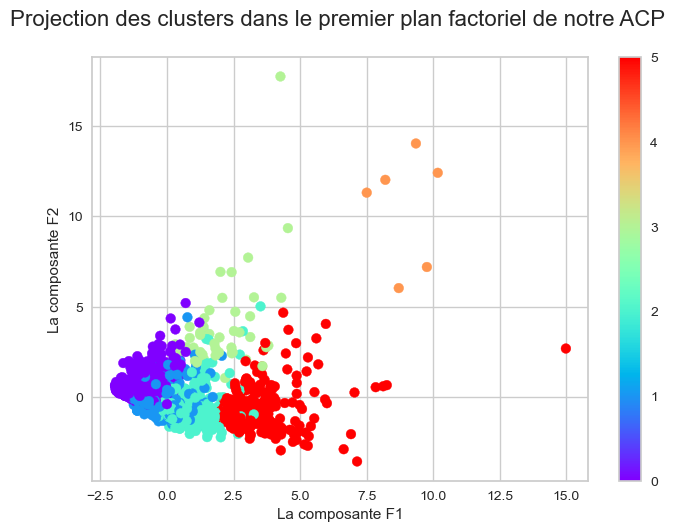

<IPython.core.display.Javascript object>

In [117]:
cmap = plt.cm.rainbow  # palette de couleur

plt.scatter(
    projected_data["F1"], projected_data["F2"], cmap=cmap, c=projected_data["Cluster"]
)
plt.colorbar()
plt.xlabel("La composante F1")
plt.ylabel("La composante F2")
plt.title(
    "Projection des clusters dans le premier plan factoriel de notre ACP \n",
    fontsize=16,
)

# Conclusion

Il existe plusieurs méthodes pour réaliser une segmentation de la clientèle. Néanmoins deux méthodes se distinguent des autres le K-mean et l'ACP. La méthode K-means qui est la plus courante lors de la segmenation de données possède l'inconvenient de ne pas ressortir exactement les mêmes resultats lorsque de la recompilation. Ainsi une maintenance semble nécessaire pour contrer cet inconvénient.